In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression #Choosing the Linear Regression as the Y/target value is in float data type 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # to find out the e value and also r2_score to find on the effect on y
from sklearn.model_selection import train_test_split #for fit and predict the data

import warnings
warnings.filterwarnings('ignore')

In [3]:
WH = pd.read_csv("C:/Users/vaddi/Downloads/happiness_score_dataset.csv")

In [4]:
WH.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
WH.columns.tolist() 

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [6]:
WH

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [7]:
WH.head() #shows top 5 lines of the data

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [8]:
WH.tail() #shows bottom 5 lines of the data

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [9]:
WH.sample() #pulls random line from the data

Country          Region  Happiness Rank  Happiness Score  Standard Error  \
18  Belgium  Western Europe              19            6.937         0.03595   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
18                   1.30782  1.28566                   0.89667   0.5845   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
18                         0.2254      0.2225            2.41484

In [10]:
WH.isnull().sum() #checking the total null values in each column/attribute

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This shows that there are no null values in the World Happiness data set.

<AxesSubplot:>

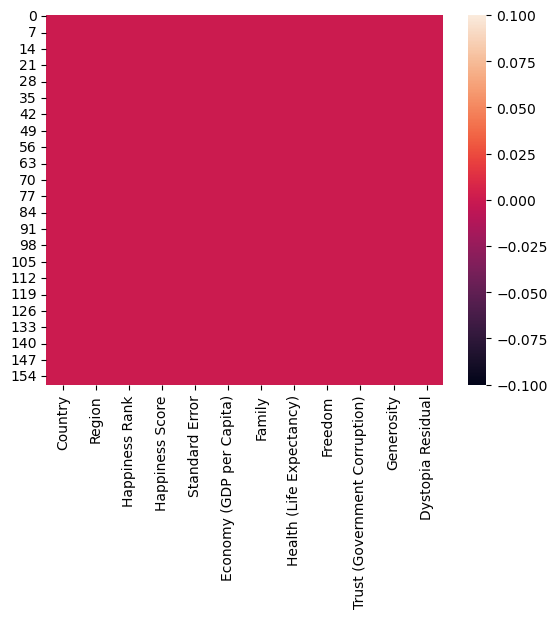

In [11]:
sns.heatmap(WH.isnull()) #Graphical representation of the null values present in the dataset

The above the Heatmap is the data visualizzation form to see that there are no null values present in the above dataset

In [12]:
WH.dtypes #Shows the data type of the each column/attribute

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

This shows that the 'country' and 'Region' columns are the object data type and the rest of the columns are the int and float data types

In [13]:
# dropping the happiness Rank as the data is already in the ascending order and the index is also present.
WH.drop('Happiness Rank', axis = 1, inplace=True)

In [14]:
#seperating Numerical and Categorical columns

#checking for categorical columns
categorical_col = []
for i in WH.dtypes.index:
    if WH.dtypes[i]== "object":
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#checking for Numerical  columns
numerical_col = []
for i in WH.dtypes.index:
    if WH.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['Country', 'Region']


Numerical Columns:  ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [15]:
WH.describe() #Gives the statistical info of the dataset

Happiness Score  Standard Error  Economy (GDP per Capita)      Family  \
count       158.000000      158.000000                158.000000  158.000000   
mean          5.375734        0.047885                  0.846137    0.991046   
std           1.145010        0.017146                  0.403121    0.272369   
min           2.839000        0.018480                  0.000000    0.000000   
25%           4.526000        0.037268                  0.545808    0.856823   
50%           5.232500        0.043940                  0.910245    1.029510   
75%           6.243750        0.052300                  1.158448    1.214405   
max           7.587000        0.136930                  1.690420    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                158.000000  158.000000                     158.000000   
mean                   0.630259    0.428615                       0.143422   
std                    0.247078    0.150693                       0.120034   
min                    0.000000    0.000000                       0.000000   
25%                    0.439185    0.328330                       0.061675   
50%                    0.696705    0.435515                       0.107220   
75%                    0.811013    0.549092                       0.180255   
max                    1.025250    0.669730                       0.551910   

       Generosity  Dystopia Residual  
count  158.000000         158.000000  
mean     0.237296           2.098977  
std      0.126685           0.553550  
min      0.000000           0.328580  
25%      0.150553           1.759410  
50%      0.216130           2.095415  
75%      0.309883           2.462415  
max      0.795880           3.602140

WH.describe gives the statistical data of the World Happiness DataSet
From the above statistical summary it is observed that
1. For few attributes the mean data is higher than the median and it shows that the data is Right Skewed.
2. For the other attributes the mean is lesser than the median and it shows that the data is Left Skewed.
3. The Standard Deviation is within 1 to -1 for all the attributes except for the Happiness Rank this shows there is no wide distribution of the data
4. There is no major difference between the 75% and max values so there is less chance for the outliers.

In [16]:
WH.skew() #Shows the skewness present in each column. The number above 0.5 and -0.5 is considered as the skewed data.

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Data Visualization

Univariate Analysis

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64


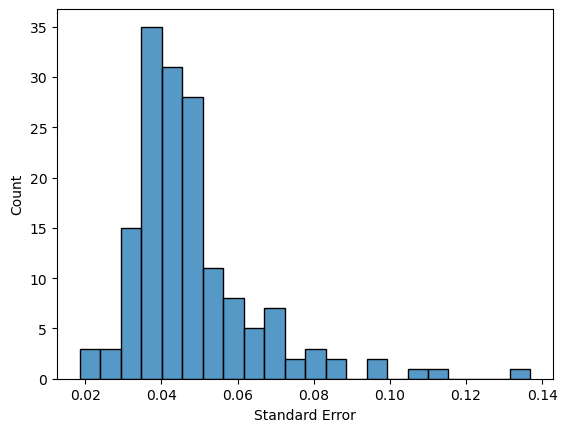

In [17]:
#Visualize the standard Error data
ax = sns.histplot(x='Standard Error',data=WH)
print(WH['Standard Error'].value_counts())

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64


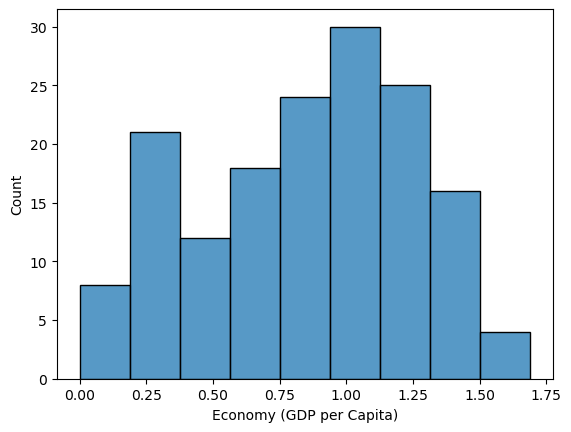

In [18]:
# Visualize  the economy  data
ax = sns.histplot(x ='Economy (GDP per Capita)',data =WH)
print(WH['Economy (GDP per Capita)'].value_counts())

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64


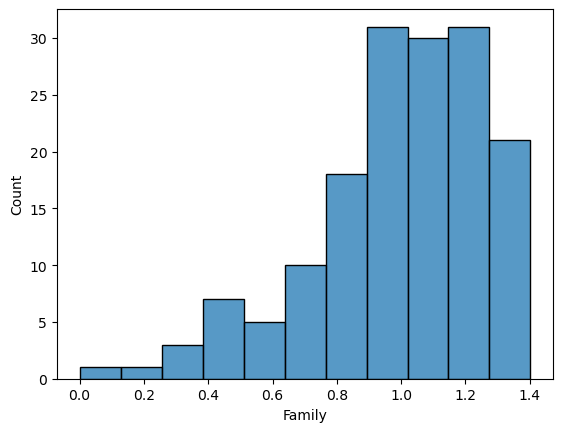

In [19]:
#Visualizing the Family data
ax = sns.histplot(x = 'Family', data = WH)
print(WH['Family'].value_counts())

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64


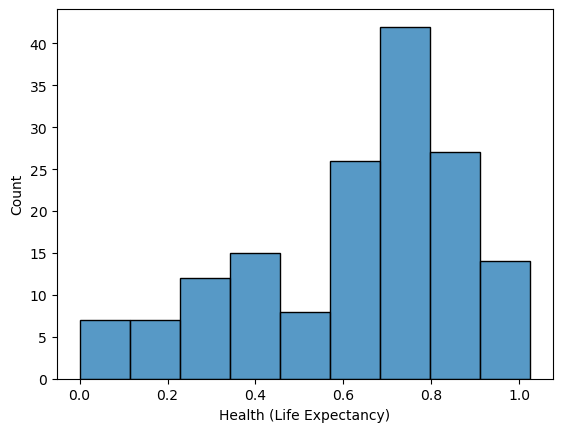

In [20]:
#Visualizing the Health (Life Expectancy)  data
ax = sns.histplot(x = 'Health (Life Expectancy)', data = WH)
print(WH['Health (Life Expectancy)'].value_counts())

0.66557    1
0.40820    1
0.07699    1
0.33916    1
0.32112    1
          ..
0.51649    1
0.60855    1
0.21342    1
0.55475    1
0.36453    1
Name: Freedom, Length: 158, dtype: int64


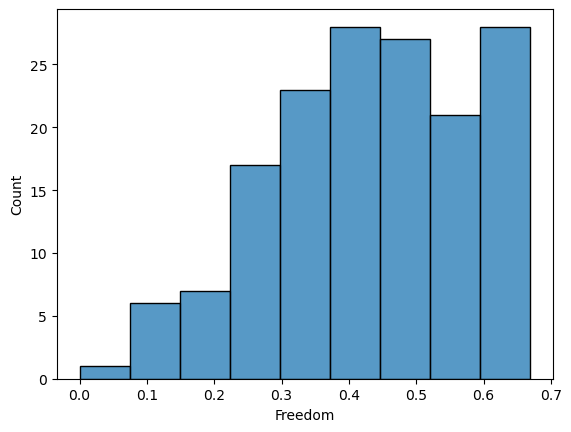

In [21]:
#Visualizing the Freedom data
ax = sns.histplot(x = 'Freedom', data = WH)
print(WH['Freedom'].value_counts())

0.32524    2
0.07625    1
0.01397    1
0.04582    1
0.02758    1
          ..
0.03787    1
0.01031    1
0.19317    1
0.05989    1
0.10731    1
Name: Trust (Government Corruption), Length: 157, dtype: int64


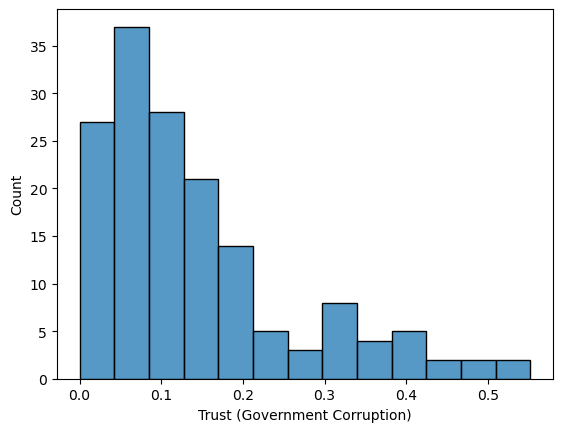

In [22]:
#Visualizing the Trust (Government Corruption) data
ax = sns.histplot(x = 'Trust (Government Corruption)', data = WH)
print(WH['Trust (Government Corruption)'].value_counts())

0.29678    1
0.21222    1
0.00000    1
0.21854    1
0.12800    1
          ..
0.11827    1
0.25328    1
0.02641    1
0.27815    1
0.16681    1
Name: Generosity, Length: 158, dtype: int64


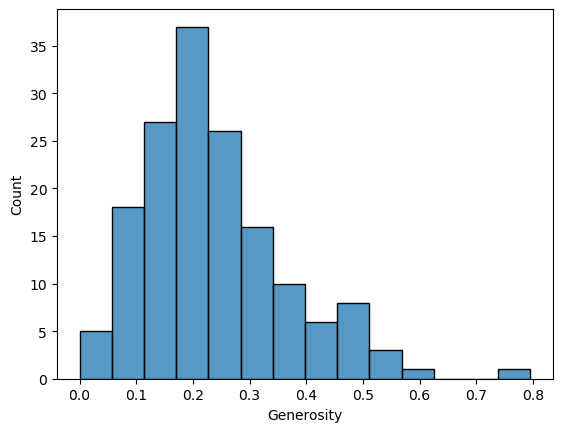

In [23]:
#Visualizing the Generosity data
ax = sns.histplot(x = 'Generosity', data = WH)
print(WH['Generosity'].value_counts())

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64


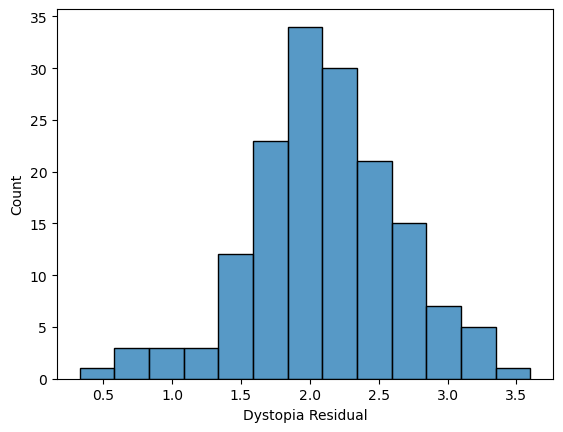

In [24]:
#Visualizing the Dystopia Residual  data 

ax = sns.histplot(x = 'Dystopia Residual', data = WH)
print(WH['Dystopia Residual'].value_counts())

Bivariate Analysis

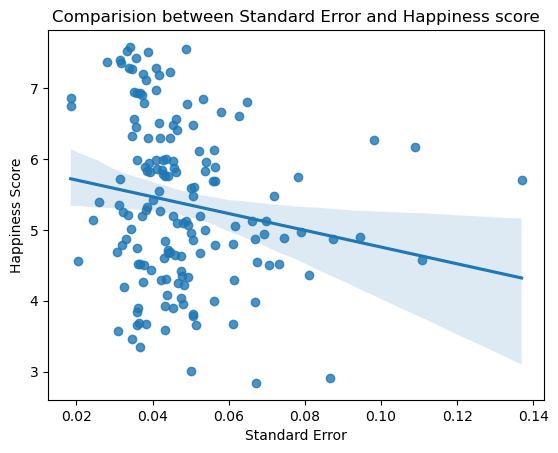

In [25]:
plt.title("Comparision between Standard Error and Happiness score")
sns.regplot(x='Standard Error', y='Happiness Score',data =WH)
plt.show()

Here it is sobserved that the most of the Standard Error data is present between 0.02 to 0.08 and the maximum the Happiness score is also achevied in this area itself

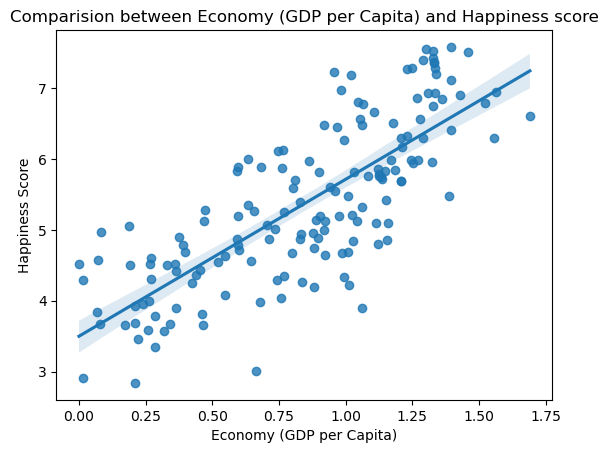

In [26]:
plt.title("Comparision between Economy (GDP per Capita) and Happiness score")
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score',data =WH)
plt.show()

Here it is observed that the Happiness score is increased witht he Economy (GDP per captia)

<function matplotlib.pyplot.show(close=None, block=None)>

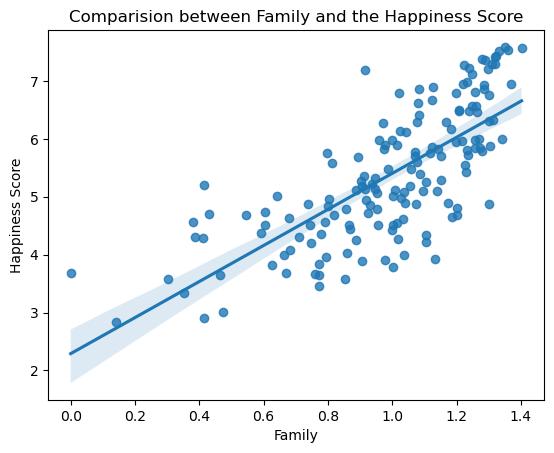

In [27]:
plt.title("Comparision between Family and the Happiness Score")
sns.regplot(x='Family', y= 'Happiness Score', data = WH)
plt.show

Here it is observed that the majority of the Family data lies between 0.4 to 1.4 and the Happiness score increases along with the Family. Both the attributes are directly propostional to each other.

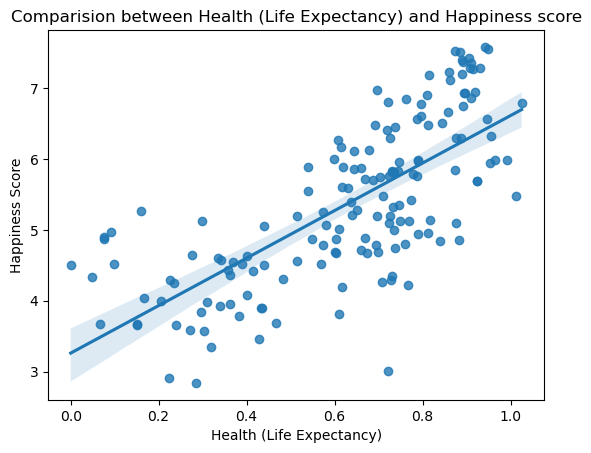

In [28]:
plt.title("Comparision between Health (Life Expectancy) and Happiness score")
sns.regplot(x='Health (Life Expectancy)', y='Happiness Score', data= WH)
plt.show()

Here is it observed that the data is widely distributed for Health(Life Expectancy), and the happiness score increases with the increase of the life expectancy

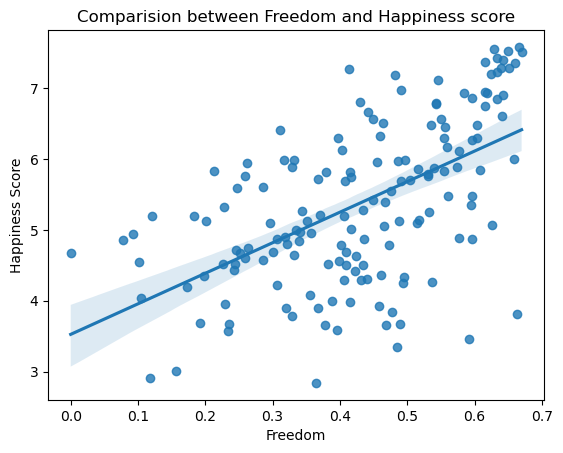

In [29]:
plt.title("Comparision between Freedom and Happiness score")
sns.regplot(x='Freedom',y='Happiness Score', data=WH)
plt.show()

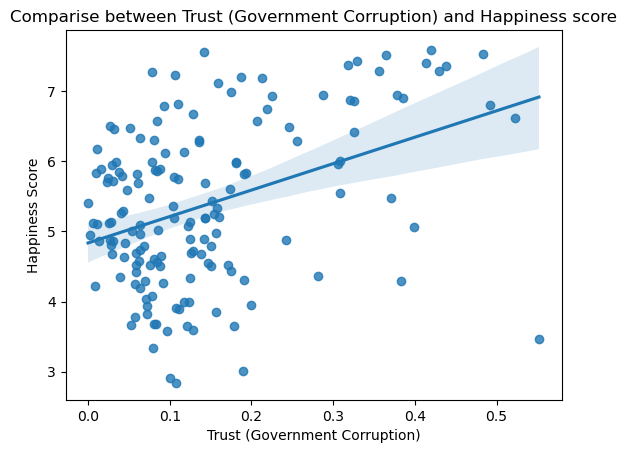

In [30]:
plt.title("Comparise between Trust (Government Corruption) and Happiness score")
sns.regplot(x='Trust (Government Corruption)',y='Happiness Score', data=WH)
plt.show()

Here it is observed that the majority of the data lies between 0.0 to 0.3  and happiness score.
it is also observed that the hapiness score isn't particularly dependent on the decrease or increase on Trust(Government corruption).
We can see that the high happiness score is observed at various points.

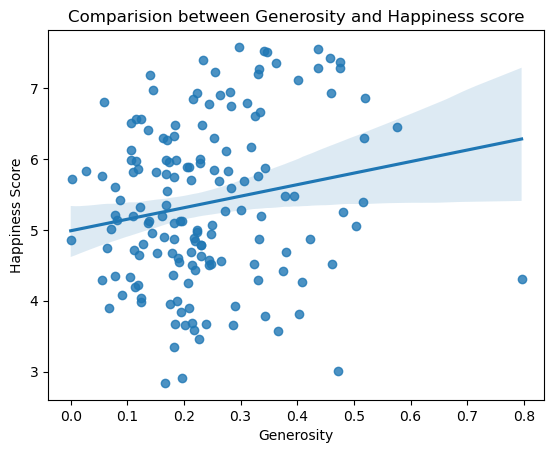

In [31]:
plt.title("Comparision between Generosity and Happiness score")
sns.regplot(x='Generosity', y= 'Happiness Score', data= WH)
plt.show()

Here it is observed that the majority of the data lies between 0.0 to 0.6.
There is no particular pattern observed that defines the relation between the happiness score and the generosity.

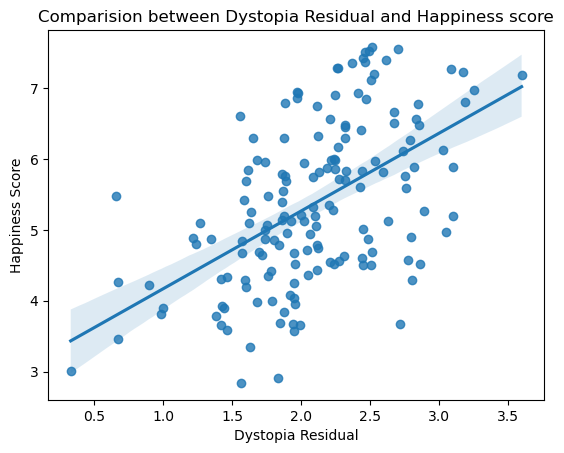

In [32]:
plt.title("Comparision between Dystopia Residual and Happiness score")
sns.regplot(x='Dystopia Residual', y='Happiness Score', data = WH)
plt.show()

Multivariante Analysis

In [33]:
corr = WH.corr() #Finding the correlation between the attributes

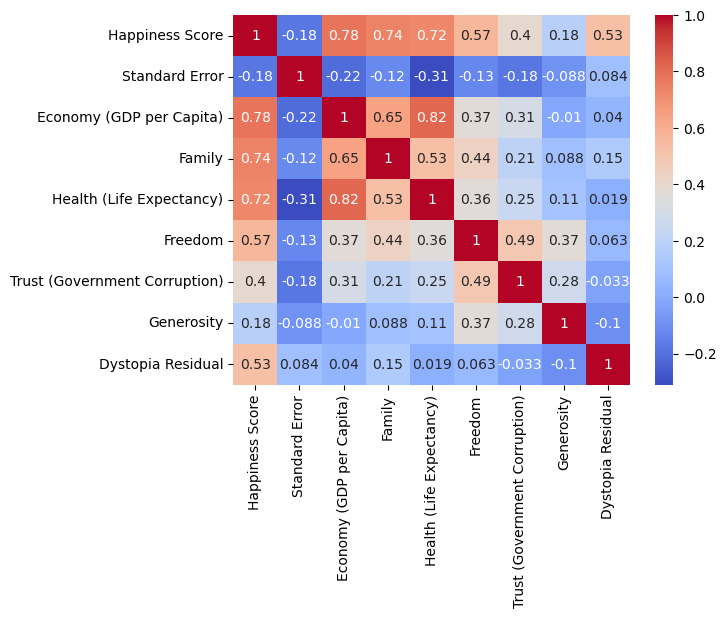

In [34]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The above heatmap shows the relation between two attributes.
My observations:
    1. Standard error has highly negative correlation with the Health
    2. Economy has highly positive correlation with health
    3. Family has highly positive correlation with economy
    4. Freedom has positive correlation with the Trust and Family
    

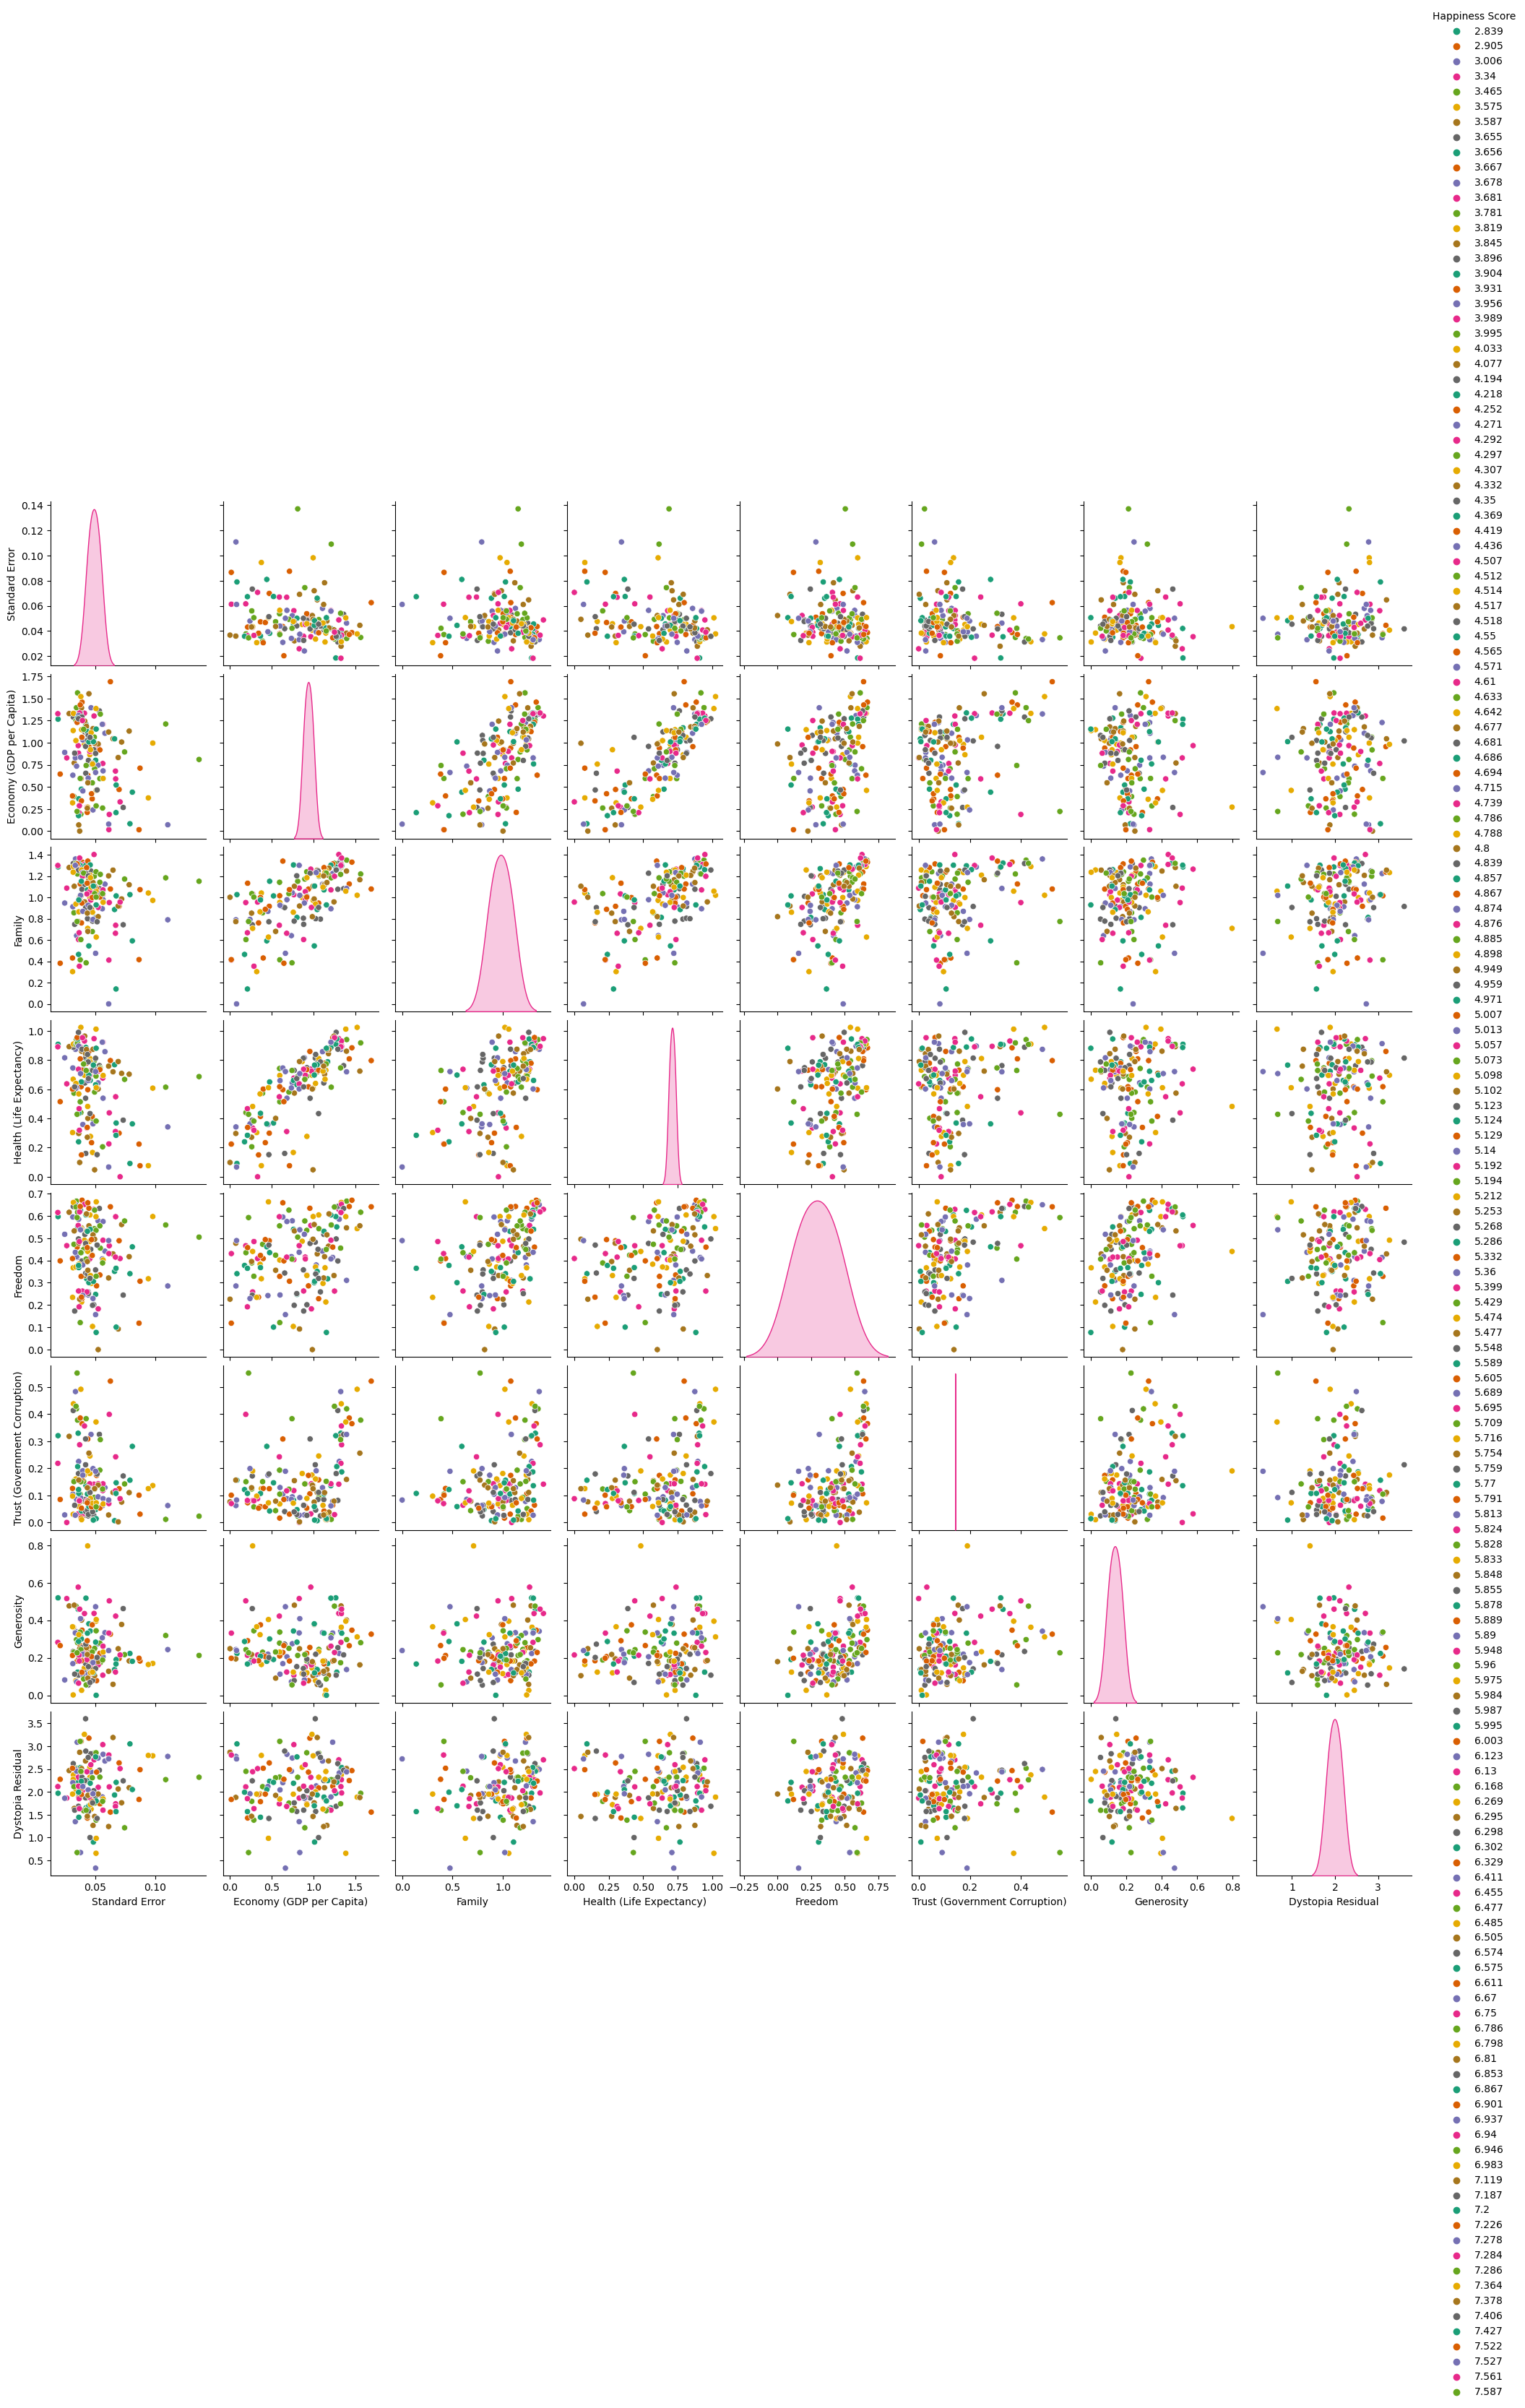

In [35]:
sns.pairplot(WH, hue= 'Happiness Score', palette = 'Dark2')
plt.show()

From the above plot we can see there are few outliers, so will plot box plot to identify the outliers for each column

<AxesSubplot:>

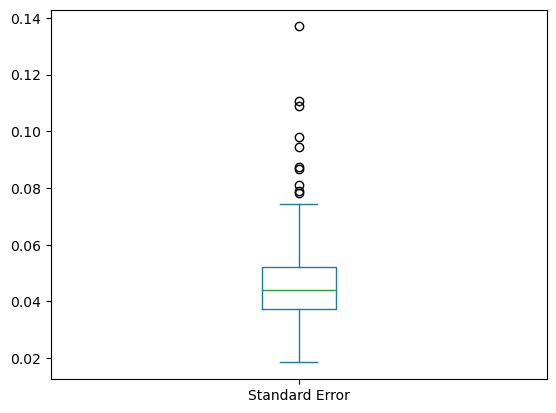

In [36]:
#Identifying the Outliers in 'Standard Error'
WH['Standard Error'].plot.box()

it is observed there are outliers present in the standard error

<AxesSubplot:>

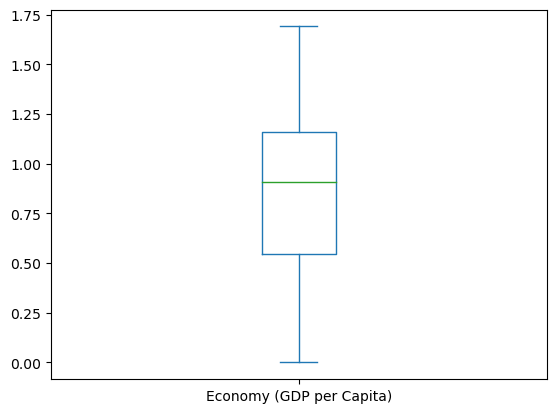

In [37]:
#Identifying the Outliers in 'Economy (GDP per Capita)'
WH['Economy (GDP per Capita)'].plot.box()

No outliers are observed for Economy (GDP per capita)

<AxesSubplot:>

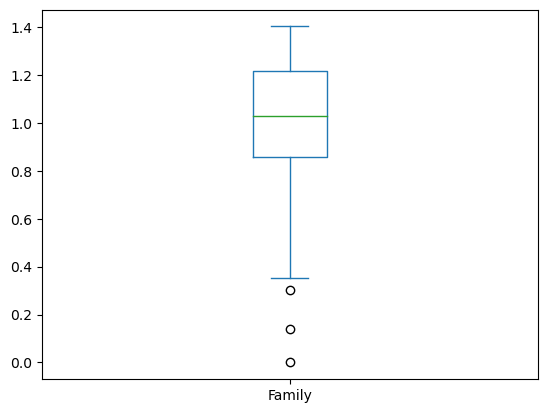

In [38]:
#Identifying the Outliers in 'Family'
WH['Family'].plot.box()

Outliers are present for theFamily attribute

<AxesSubplot:>

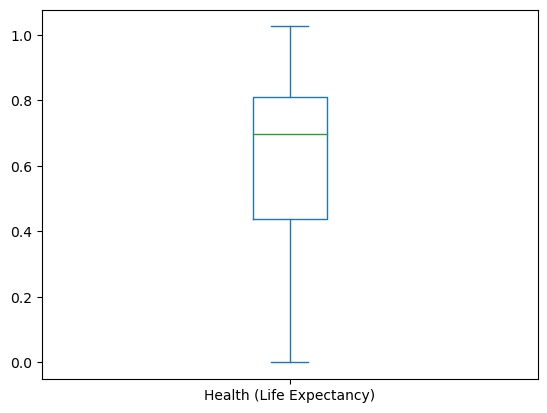

In [39]:
#Identifying the Outliers in 'Health (Life Expectancy)'
WH['Health (Life Expectancy)'].plot.box()

No outliers are observed for Health (Life Expectancy)

<AxesSubplot:>

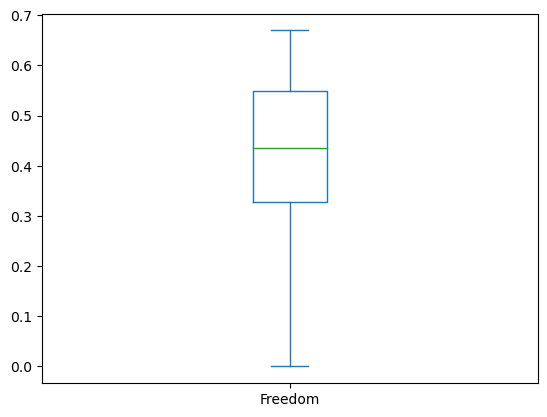

In [40]:
#Identifying the Outliers in 'Freedom'
WH['Freedom'].plot.box()

No outliers are observed for Freedom

<AxesSubplot:>

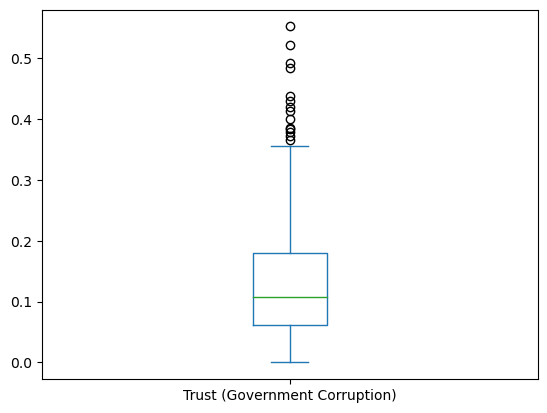

In [41]:
#Identifying the Outliers in 'Trust (Government Corruption)'
WH['Trust (Government Corruption)'].plot.box()

There are outliers are observed for Trust (Government Corruption)

<AxesSubplot:>

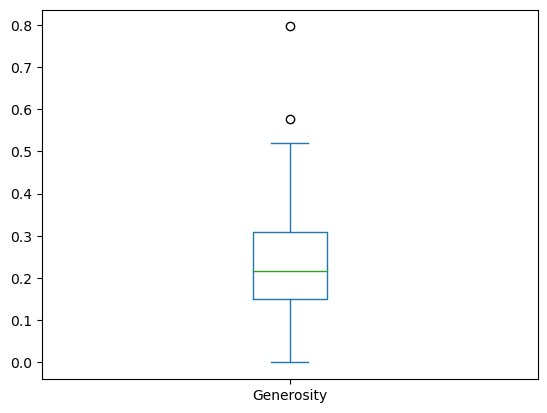

In [42]:
#Identifying the Outliers in 'Generosity'
WH['Generosity'].plot.box()

There are outliers observed for the Generosity

<AxesSubplot:>

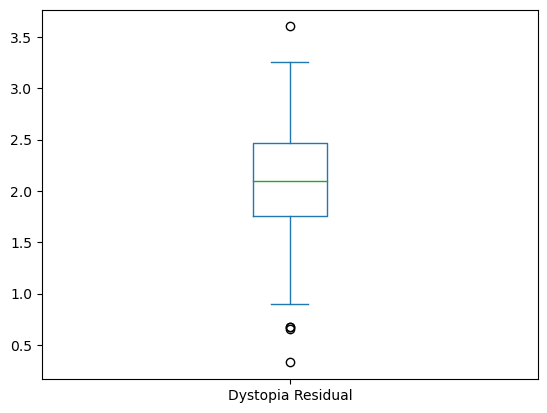

In [43]:
#Identifying the Outliers in 'Dystopia Residual'
WH['Dystopia Residual'].plot.box()

There are outliers observed for Dystopia Residual

In [44]:
x=WH.iloc[:,3:-1]  #let's create x data by elemenating the categorical data and target variable

In [45]:
x


Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  
0       0.29678  
1       0.43630  
2       0.34139  
3       0.34699  
4       0.45811  
..          ...  
153     0.22628  
154     0.18260  
155     0.47179  
156     0.19727  
157     0.16681  

[158 rows x 7 columns]

In [46]:
#Finding out the z score to eleminate the outliers    
z=np.abs(zscore(x))
z

Standard Error  Economy (GDP per Capita)    Family  \
0          0.805926                  1.369621  1.320281   
1          0.055889                  1.135226  1.514458   
2          0.854487                  1.192861  1.361054   
3          0.531526                  1.525130  1.251922   
4          0.722845                  1.194876  1.221204   
..              ...                       ...       ...   
153        0.774917                  1.552987  0.800520   
154        0.662582                  1.392303  2.346860   
155        0.132534                  0.455245  1.901086   
156        2.263962                  2.067566  2.118467   
157        1.134182                  1.586334  3.134725   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.263408  1.577438                       2.309652   
1                    1.289434  1.332456                       0.016480   
2                    0.992229  1.469659                       2.842774   
3                    1.035145  1.605131                       1.852081   
4                    1.118054  1.360416                       1.555725   
..                        ...       ...                            ...   
153                  0.818610  1.087740                       3.413922   
154                  1.263362  0.372033                       0.529210   
155                  0.372199  1.809238                       0.381419   
156                  1.649648  2.064472                       0.357715   
157                  1.404129  0.426621                       0.301803   

     Generosity  
0      0.471040  
1      1.575856  
2      0.824293  
3      0.868638  
4      1.748563  
..          ...  
153    0.087228  
154    0.433117  
155    1.856891  
156    0.316950  
157    0.558153  

[158 rows x 7 columns]

In [47]:
Threshold= 3   #data lying above +_3 are called outliers
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 157], dtype=int64), array([5, 0, 0, 0, 6, 2, 5, 2], dtype=int64))


The above data shows the values that are higher than the thresold value. Lets check it 

In [48]:
z.iloc[27][5] #verifying the zscore value of the particular cell 

3.1646194851713774

In [49]:
z.iloc[40][0]

3.5727739331415806

Will remove the data that contains outliers and create new data set


In [50]:
WH_new= WH[(z<3).all(axis=1)]  

In [51]:
WH_new

Country                           Region  Happiness Score  \
0     Switzerland                   Western Europe            7.587   
1         Iceland                   Western Europe            7.561   
2         Denmark                   Western Europe            7.527   
3          Norway                   Western Europe            7.522   
4          Canada                    North America            7.427   
..            ...                              ...              ...   
151  Burkina Faso               Sub-Saharan Africa            3.587   
152   Afghanistan                    Southern Asia            3.575   
154         Benin               Sub-Saharan Africa            3.340   
155         Syria  Middle East and Northern Africa            3.006   
156       Burundi               Sub-Saharan Africa            2.905   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
151         0.04324                   0.25812  0.85188   
152         0.03084                   0.31982  0.30285   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
151                   0.27125  0.39493                        0.12832   
152                   0.30335  0.23414                        0.09719   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
151     0.21747            1.46494  
152     0.36510            1.95210  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  

[150 rows x 11 columns]

Here, we remove the data with the zscore value with more than 3 which also means the outliears and created a new dataset.

In [52]:
WH_new.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Checking for Skewness

In [53]:
WH_new.skew() #Let's check the skewness of each attribute

Happiness Score                  0.138125
Standard Error                   1.240644
Economy (GDP per Capita)        -0.381407
Family                          -0.798605
Health (Life Expectancy)        -0.755919
Freedom                         -0.391806
Trust (Government Corruption)    1.266162
Generosity                       0.644088
Dystopia Residual               -0.195486
dtype: float64

Data above 0.5 and -0.5 have skewness. Here Standard Error, Family, Health, Trust, Generosity have skewness.

Removing the skewness

In [54]:
#Applying the log method to remove the right skeweness
WH_new['Standard Error']= np.log(WH_new['Standard Error'])

In [55]:
#Using the Cube root method
WH_new['Trust (Government Corruption)']=np.cbrt(WH_new['Trust (Government Corruption)'])

In [56]:
#WH_new['Generosity']=np.log(WH_new['Generosity'])
#Using the Square root method as the log method gave the Nan value as a result.
WH_new['Generosity']=np.sqrt(WH_new['Generosity'])

Lets reduce the skewness for the negative data

In [57]:
#WH_new['Family'] = np.log(WH_new['Family'])
#WH_new['Family'] = np.sqrt(WH_new['Family'])

#Here applying the yeajohnson method as both log and square root methods didnt work and gave the Nan value as the result
from scipy.stats import yeojohnson
WH_new['Family'], lambda_value = yeojohnson(WH_new['Family'])

In [58]:
WH_new['Health (Life Expectancy)'], lambda_value = yeojohnson(WH_new['Health (Life Expectancy)'])

In [59]:
WH_new.skew()

Happiness Score                  0.138125
Standard Error                   0.115245
Economy (GDP per Capita)        -0.381407
Family                          -0.152475
Health (Life Expectancy)        -0.190102
Freedom                         -0.391806
Trust (Government Corruption)   -0.075835
Generosity                      -0.279777
Dystopia Residual               -0.195486
dtype: float64

Now the skewness is removed and the data looks normal

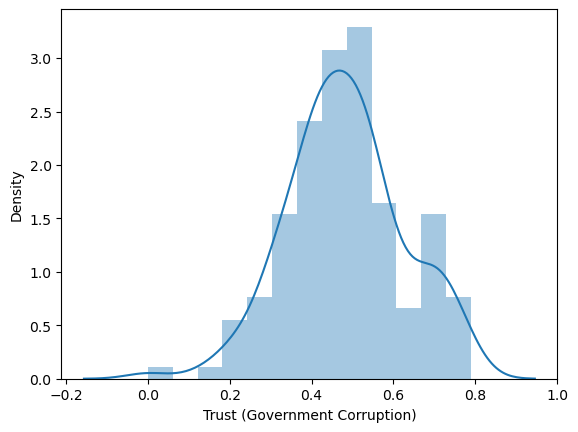

In [60]:
#Let's see how the data looks like after reducing the skewness
sns.distplot(WH_new['Trust (Government Corruption)'])
plt.show()

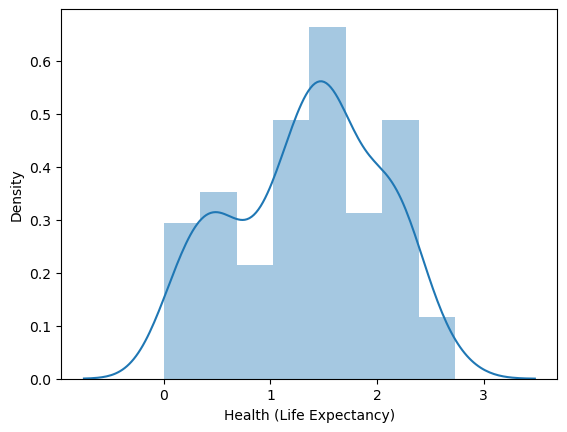

In [61]:
sns.distplot(WH_new['Health (Life Expectancy)'])
plt.show()

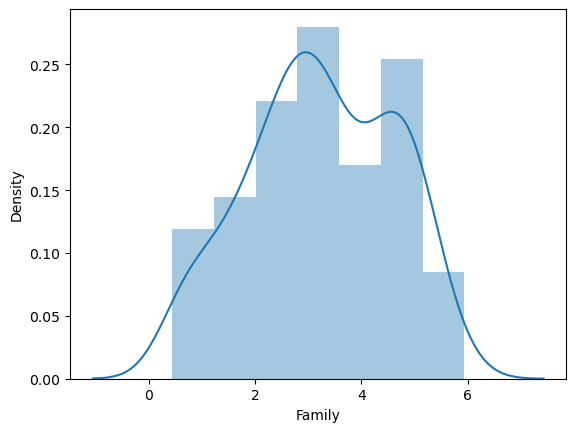

In [62]:
sns.distplot(WH_new['Family'])
plt.show()

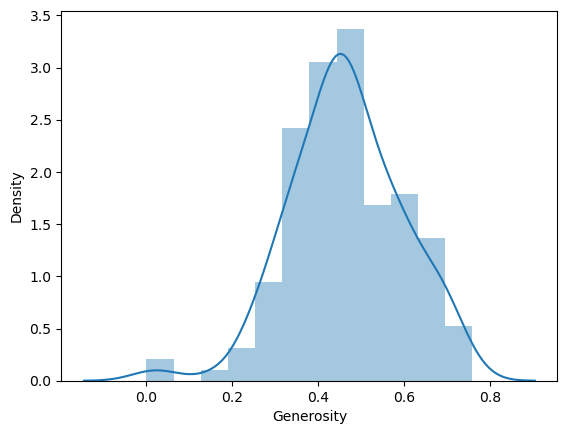

In [63]:
sns.distplot(WH_new['Generosity'])
plt.show()

Encoding the categorical columns

In [64]:
!pip install category_encoders

In [65]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Country', 'Region'])
WH_new_encoded = encoder.fit_transform(WH_new)

Here i used binary Encoder from Category encoders to transform the categorical data into the binary form. Let's take a look at the new encoded data set 

In [66]:
WH_new_encoded

Country_0  Country_1  Country_2  Country_3  Country_4  Country_5  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          1   
4            0          0          0          0          0          1   
..         ...        ...        ...        ...        ...        ...   
151          1          0          0          1          0          0   
152          1          0          0          1          0          0   
154          1          0          0          1          0          1   
155          1          0          0          1          0          1   
156          1          0          0          1          0          1   

     Country_6  Country_7  Region_0  Region_1  ...  Region_3  Happiness Score  \
0            0          1         0         0  ...         1            7.587   
1            1          0         0         0  ...         1            7.561   
2            1          1         0         0  ...         1            7.527   
3            0          0         0         0  ...         1            7.522   
4            0          1         0         0  ...         0            7.427   
..         ...        ...       ...       ...  ...       ...              ...   
151          1          0         1         0  ...         1            3.587   
152          1          1         1         0  ...         0            3.575   
154          0          0         1         0  ...         1            3.340   
155          0          1         0         1  ...         0            3.006   
156          1          0         1         0  ...         1            2.905   

     Standard Error  Economy (GDP per Capita)    Family  \
0         -3.378165                   1.39651  5.469606   
1         -3.019206                   1.30232  5.937390   
2         -3.402799                   1.32548  5.565666   
3         -3.249335                   1.45900  5.311095   
4         -3.337378                   1.32629  5.240897   
..              ...                       ...       ...   
151       -3.140989                   0.25812  2.203964   
152       -3.478943                   0.31982  0.436997   
154       -3.308801                   0.28665  0.541427   
155       -2.992737                   0.66320  0.831970   
156       -2.446686                   0.01530  0.682457   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    2.342416  0.66557                       0.748756   
1                    2.370901  0.62877                       0.521036   
2                    2.057950  0.64938                       0.784910   
3                    2.101489  0.66973                       0.714677   
4                    2.187165  0.63297                       0.690742   
..                        ...      ...                            ...   
151                  0.363170  0.39493                       0.504388   
152                  0.419730  0.23414                       0.459770   
154                  0.448650  0.48450                       0.431066   
155                  1.488062  0.15684                       0.573940   
156                  0.285490  0.11850                       0.465116   

     Generosity  Dystopia Residual  
0      0.544775            2.51738  
1      0.660530            2.70201  
2      0.584286            2.49204  
3      0.589059            2.46531  
4      0.676838            2.45176  
..          ...                ...  
151    0.466337            1.46494  
152    0.604235            1.95210  
154    0.427317            1.63328  
155    0.686870            0.32858  
156    0.444151            1.83302  

[150 rows x 21 columns]

In [67]:
WH_new_encoded.info() #information about the null values and the data types of each column in new dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 156
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_0                      150 non-null    int64  
 1   Country_1                      150 non-null    int64  
 2   Country_2                      150 non-null    int64  
 3   Country_3                      150 non-null    int64  
 4   Country_4                      150 non-null    int64  
 5   Country_5                      150 non-null    int64  
 6   Country_6                      150 non-null    int64  
 7   Country_7                      150 non-null    int64  
 8   Region_0                       150 non-null    int64  
 9   Region_1                       150 non-null    int64  
 10  Region_2                       150 non-null    int64  
 11  Region_3                       150 non-null    int64  
 12  Happiness Score                150 non-null    flo

Here the data type of every column is either int or float.

In [68]:
#statistical summary
WH_new_encoded.describe()

Country_0   Country_1   Country_2   Country_3   Country_4   Country_5  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     0.153333    0.426667    0.426667    0.473333    0.480000    0.500000   
std      0.361516    0.496250    0.496250    0.500961    0.501274    0.501675   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000   
75%      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Country_6   Country_7    Region_0    Region_1  ...    Region_3  \
count  150.000000  150.000000  150.000000  150.000000  ...  150.000000   
mean     0.500000    0.500000    0.326667    0.506667  ...    0.720000   
std      0.501675    0.501675    0.470565    0.501630  ...    0.450503   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.500000    0.500000    0.000000    1.000000  ...    1.000000   
75%      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

       Happiness Score  Standard Error  Economy (GDP per Capita)      Family  \
count       150.000000      150.000000                150.000000  150.000000   
mean          5.413453       -3.114860                  0.860837    3.231162   
std           1.125061        0.286839                  0.387012    1.356534   
min           2.905000       -3.991066                  0.000000    0.436997   
25%           4.576250       -3.299152                  0.593558    2.306893   
50%           5.260500       -3.131781                  0.919550    3.177875   
75%           6.288500       -2.982372                  1.158448    4.449353   
max           7.587000       -2.321666                  1.563910    5.937390   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                150.000000  150.000000                     150.000000   
mean                   1.341138    0.425645                       0.482069   
std                    0.681040    0.151972                       0.141869   
min                    0.000000    0.000000                       0.000000   
25%                    0.789662    0.322885                       0.395580   
50%                    1.434506    0.432520                       0.477207   
75%                    1.819166    0.545160                       0.562746   
max                    2.731816    0.669730                       0.789498   

       Generosity  Dystopia Residual  
count  150.000000         150.000000  
mean     0.464517           2.108914  
std      0.132069           0.543942  
min      0.000000           0.328580  
25%      0.378777           1.787395  
50%      0.462714           2.095415  
75%      0.552136           2.462415  
max      0.759144           3.602140  

[8 rows x 21 columns]

In [69]:
#let's check the correlation value of the new dataset
corr= WH_new_encoded.corr()
corr

Country_0     Country_1     Country_2  \
Country_0                       1.000000 -3.671156e-01 -3.671156e-01   
Country_1                      -0.367116  1.000000e+00  1.279070e-01   
Country_2                      -0.367116  1.279070e-01  1.000000e+00   
Country_3                      -0.144032  4.607422e-02  4.607422e-02   
Country_4                      -0.112586  3.453413e-02  3.453413e-02   
Country_5                      -0.018503  4.414617e-17  2.618841e-17   
Country_6                      -0.018503  3.591553e-17  4.489441e-17   
Country_7                      -0.018503  1.421656e-17  9.727122e-18   
Region_0                        0.413718  2.038655e-01  2.682440e-03   
Region_1                       -0.246231  1.545740e-02  1.502604e-01   
Region_2                       -0.172938  1.883991e-01  4.392127e-02   
Region_3                        0.059341 -1.224830e-01 -6.244230e-02   
Happiness Score                -0.619571 -3.873259e-01 -8.611795e-02   
Standard Error                  0.015451  1.891052e-01  1.154584e-01   
Economy (GDP per Capita)       -0.470868 -3.062064e-01 -5.906527e-02   
Family                         -0.416884 -3.708028e-01 -4.749521e-02   
Health (Life Expectancy)       -0.471560 -2.853047e-01 -7.023678e-02   
Freedom                        -0.250678 -3.405157e-01 -1.511600e-01   
Trust (Government Corruption)  -0.087353 -2.451075e-01 -2.031057e-01   
Generosity                     -0.037832 -6.974621e-02 -1.663218e-01   
Dystopia Residual              -0.417180 -1.569144e-01  2.733079e-02   

                               Country_3     Country_4     Country_5  \
Country_0                      -0.144032 -1.125863e-01 -1.850266e-02   
Country_1                       0.046074  3.453413e-02  4.414617e-17   
Country_2                       0.046074  3.453413e-02  2.618841e-17   
Country_3                       1.000000 -5.559021e-02 -1.335234e-02   
Country_4                      -0.055590  1.000000e+00  9.629640e-18   
Country_5                      -0.013352  9.629640e-18  1.000000e+00   
Country_6                      -0.013352  1.185186e-17 -1.333333e-02   
Country_7                      -0.013352 -1.333335e-17 -1.333333e-02   
Region_0                        0.022966  1.365715e-02  4.264445e-02   
Region_1                        0.054126  9.395020e-02  7.402145e-18   
Region_2                        0.065262  8.467373e-02  2.858310e-02   
Region_3                        0.204598 -2.496436e-02 -2.969569e-02   
Happiness Score                -0.087894  2.265367e-03 -3.138012e-02   
Standard Error                  0.116977 -2.047824e-02  8.973447e-02   
Economy (GDP per Capita)       -0.124551 -3.483084e-02  7.510648e-02   
Family                         -0.098988 -5.077252e-02 -3.942852e-03   
Health (Life Expectancy)       -0.084458  2.246170e-02  5.041985e-02   
Freedom                        -0.040628 -2.541164e-02  2.602897e-02   
Trust (Government Corruption)  -0.052224  3.674968e-02 -2.022183e-02   
Generosity                     -0.073071 -9.468006e-02 -5.025267e-02   
Dystopia Residual               0.040762  6.490226e-02 -1.262646e-01   

                                  Country_6     Country_7  Region_0  \
Country_0                     -1.850266e-02 -1.850266e-02  0.413718   
Country_1                      3.591553e-17  1.421656e-17  0.203865   
Country_2                      4.489441e-17  9.727122e-18  0.002682   
Country_3                     -1.335234e-02 -1.335234e-02  0.022966   
Country_4                      1.185186e-17 -1.333335e-17  0.013657   
Country_5                     -1.333333e-02 -1.333333e-02  0.042644   
Country_6                      1.000000e+00 -1.333333e-02 -0.014215   
Country_7                     -1.333333e-02  1.000000e+00 -0.099504   
Region_0                      -1.421482e-02 -9.950372e-02  1.000000   
Region_1                       2.666904e-02  5.333807e-02 -0.705876   
Region_2                       2.858310e-02 -2.858310e-02 -0.264504   
Region_3 

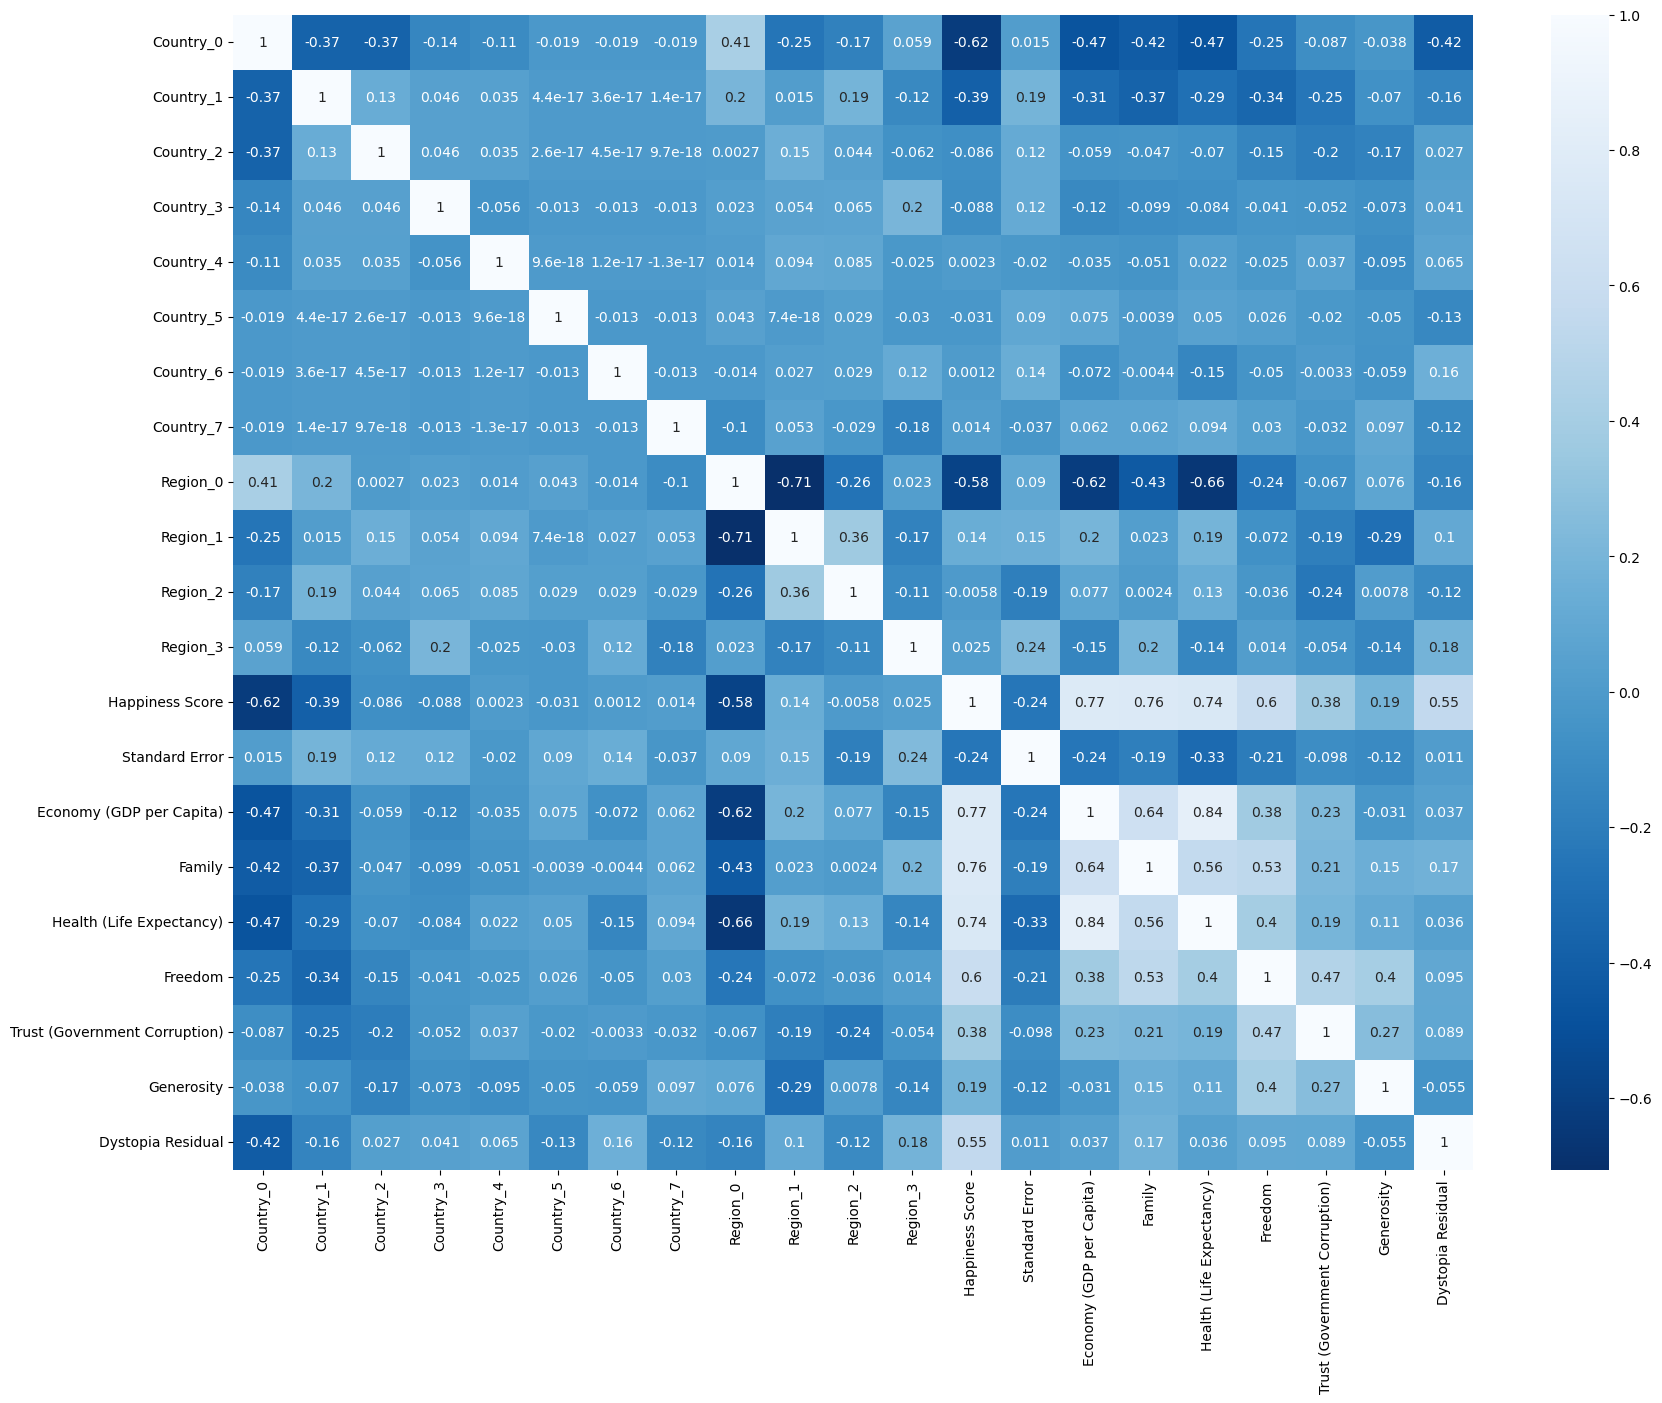

In [70]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True, cmap ="Blues_r")
plt.yticks(rotation =0);
plt.show()

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between the features. it contains both positive and negative correlation values.

1. Here the correlation between the categorical data and the attributes is also shown
2. Highly positive correlation is observed between Happiness score and Economy, Family and Health
3. Sightly negative correlation is observed between Health and standard error
4. Highly positive correlation is observed between the economy and  health
5. Family & Health and other columns had positive correlation with almost all the columns except standard error


 Now lets split the data into  X and y for linear Regression ML method

In [71]:
X = WH_new_encoded.loc[:, WH_new_encoded.columns != WH_new_encoded.columns[12]] #Here i am taking all the rows and columns as x data except the column number 12 which is Target value

In [72]:
X


Country_0  Country_1  Country_2  Country_3  Country_4  Country_5  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          1   
4            0          0          0          0          0          1   
..         ...        ...        ...        ...        ...        ...   
151          1          0          0          1          0          0   
152          1          0          0          1          0          0   
154          1          0          0          1          0          1   
155          1          0          0          1          0          1   
156          1          0          0          1          0          1   

     Country_6  Country_7  Region_0  Region_1  Region_2  Region_3  \
0            0          1         0         0         0         1   
1            1          0         0         0         0         1   
2            1          1         0         0         0         1   
3            0          0         0         0         0         1   
4            0          1         0         0         1         0   
..         ...        ...       ...       ...       ...       ...   
151          1          0         1         0         0         1   
152          1          1         1         0         1         0   
154          0          0         1         0         0         1   
155          0          1         0         1         0         0   
156          1          0         1         0         0         1   

     Standard Error  Economy (GDP per Capita)    Family  \
0         -3.378165                   1.39651  5.469606   
1         -3.019206                   1.30232  5.937390   
2         -3.402799                   1.32548  5.565666   
3         -3.249335                   1.45900  5.311095   
4         -3.337378                   1.32629  5.240897   
..              ...                       ...       ...   
151       -3.140989                   0.25812  2.203964   
152       -3.478943                   0.31982  0.436997   
154       -3.308801                   0.28665  0.541427   
155       -2.992737                   0.66320  0.831970   
156       -2.446686                   0.01530  0.682457   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    2.342416  0.66557                       0.748756   
1                    2.370901  0.62877                       0.521036   
2                    2.057950  0.64938                       0.784910   
3                    2.101489  0.66973                       0.714677   
4                    2.187165  0.63297                       0.690742   
..                        ...      ...                            ...   
151                  0.363170  0.39493                       0.504388   
152                  0.419730  0.23414                       0.459770   
154                  0.448650  0.48450                       0.431066   
155                  1.488062  0.15684                       0.573940   
156                  0.285490  0.11850                       0.465116   

     Generosity  Dystopia Residual  
0      0.544775            2.51738  
1      0.660530            2.70201  
2      0.584286            2.49204  
3      0.589059            2.46531  
4      0.676838            2.45176  
..          ...                ...  
151    0.466337            1.46494  
152    0.604235            1.95210  
154    0.427317            1.63328  
155    0.686870            0.32858  
156    0.444151            1.83302  

[150 rows x 20 columns]

In [73]:
y = WH_new_encoded.loc[:, WH_new_encoded.columns[12]] #The target value which is Happiness score is stored in y varaible

In [74]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.587
152    3.575
154    3.340
155    3.006
156    2.905
Name: Happiness Score, Length: 150, dtype: float64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #spliting the data for fit and predict method


In [76]:
X_train.shape

(120, 20)

In [77]:
X_test.shape

(30, 20)

In [78]:
y_train.shape

(120,)

In [79]:
y_test.shape

(30,)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [81]:
model.coef_

array([-0.67098466, -0.28409427, -0.1727017 , -0.10475478, -0.04424256,
       -0.02517281, -0.01451278,  0.00781492, -0.02619885,  0.02664528,
        0.00969873,  0.01329234, -0.03050418,  0.81626664,  0.15398012,
        0.27081827,  0.80657158,  0.57843004,  0.69183394,  0.78840337])

In [82]:
model.intercept_ #This is a point from where the straight line is drown covering maximun number of data points

1.5169545400562523

In [83]:
model.score(X_train,y_train) #this shows the accuracy of the model

0.9967729424779965

In [84]:
y_pred = model.predict(X_test)

In [85]:
y_pred #These are the predicted values my the ML method

array([5.34855498, 6.98378078, 4.56775758, 5.24461353, 5.28190987,
       6.50099233, 5.63372771, 3.63168297, 5.49496722, 5.08763613,
       4.6012448 , 7.23911996, 6.29233417, 7.25863984, 6.81178424,
       5.85553644, 4.71216711, 5.5502603 , 5.78520984, 3.99168809,
       6.51220326, 4.19260177, 6.66639596, 4.14020281, 4.02266387,
       3.54590723, 4.66896547, 3.71155394, 5.98267242, 6.5089473 ])

In [86]:
print("actual values", y_test) #This are the actual values

actual values 76     5.286
18     6.937
122    4.507
81     5.192
79     5.212
32     6.477
67     5.605
146    3.681
71     5.474
85     5.124
113    4.633
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
107    4.715
72     5.429
57     5.824
137    3.995
30     6.505
132    4.252
26     6.670
133    4.218
136    4.033
151    3.587
111    4.677
149    3.656
47     5.975
31     6.485
Name: Happiness Score, dtype: float64


In [87]:
#These gives the e value of the model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error: 0.03821577784313464
Mean Squared Error: 0.0022492737427825967
Root Mean Squared Error: 0.047426508861422606
R-squared (R²): 0.9981509829814872


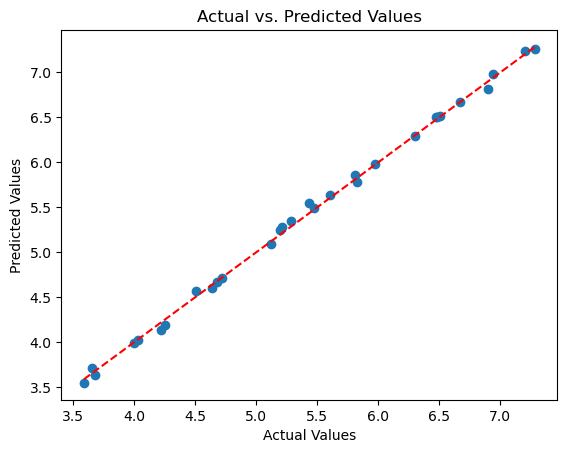

In [88]:
#Visual representation of the model
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [89]:
#testing the model
t =np.array([0,0,0,0,0,1,0,1,0,0,1,0,-3.337378,1.32629,5.240897,2.187165,0.63297,0.690742,0.676838,2.45176])

In [90]:
t.shape

(20,)

In [91]:
t=t.reshape(1,-1)
t.shape

(1, 20)

In [92]:
model.predict(t)

array([7.4043407])

# Titanic survived Project 

In [625]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [94]:
tsp = pd.read_csv("C:/Users/vaddi/Downloads/titanic_train.csv")

In [95]:
tsp

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [96]:
tsp.head() #Calls the top 5 rows in the dataset

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [97]:
tsp.tail() #Calls bottom 5 rows in the dataset

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [98]:
tsp.sample() #Calls any random row from the dataset

PassengerId  Survived  Pclass                               Name     Sex  \
720          721         1       2  Harper, Miss. Annie Jessie "Nina"  female   

     Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
720  6.0      0      1  248727  33.0   NaN        S

In [99]:
tsp.columns #Lists out the columns in the dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [100]:
tsp.columns.tolist() #Converting the columns into the list format

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [101]:
tsp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives the following information about the dataset
1. The dataset contains 891 rows and 12 columns
2. The data types of each row
3. There are 2 rows with float data type, 5 with int and 5 with object

In [102]:
tsp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 Null values in Age column, 687 Null values in cabin column and 2 in embarked

<AxesSubplot:>

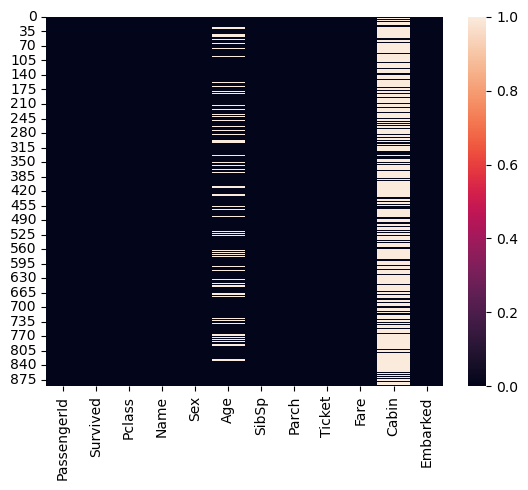

In [103]:
sns.heatmap(tsp.isnull())

In [104]:
duplicates = tsp[tsp.duplicated()] #To check if there are any duplicate values in the dataset.
duplicates

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

This shows that there are no duplicates in the dataset

In [105]:
#checking the  rows with NaN values in Cabin
rows_with_nan_cabin = tsp[pd.isna(tsp["Cabin"])]  
rows_with_nan_cabin

PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S  
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4      male  35.0      0      0            373450   8.0500   NaN        S  
5      male   NaN      0      0            330877   8.4583   NaN        Q  
7      male   2.0      3      1            349909  21.0750   NaN        S  
..      ...   ...    ...    ...               ...      ...   ...      ...  
884    male  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885  female  39.0      0      5            382652  29.1250   NaN        Q  
886    male  27.0      0      0            211536  13.0000   NaN        S  
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S  
890    male  32.0      0      0            370376   7.7500   NaN        Q  

[687 rows x 12 columns]

This returns the rows in which the Cabin column has NaN values.

In [106]:
print("The mode value for Cabin is =", tsp['Cabin'].mode())

The mode value for Cabin is = 0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


Here i am checking for the Mode value of the Cabin column so that i can fill the NaN values with the mode.\
But the mode funtion is returning 6 values, which means these values are repeated equally and the data has multiply mode values.

I can either go ahead and choose one of the mode values to fill the NaN values in the cabin column or check for an alternative method

In [107]:
#tsp['Cabin'].fillna(tsp['Cabin'].mode()[0], inplace=True)

tsp['Cabin'].fillna('Unknown', inplace=True)


Here i am choosing to fill the NaN values of 'Cabin' column with 'Unknown' in the dataset

In [108]:
tsp['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [109]:
tsp.isnull().sum() #The null values in the Cabin column are filled with a placeholder

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [110]:
tsp['Age'] 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [111]:
rows_with_null_age = tsp[pd.isnull(tsp['Age'])]
rows_with_null_age

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare    Cabin Embarked  
5      male  NaN      0      0      330877   8.4583  Unknown        Q  
17     male  NaN      0      0      244373  13.0000  Unknown        S  
19   female  NaN      0      0        2649   7.2250  Unknown        C  
26     male  NaN      0      0        2631   7.2250  Unknown        C  
28   female  NaN      0      0      330959   7.8792  Unknown        Q  
..      ...  ...    ...    ...         ...      ...      ...      ...  
859    male  NaN      0      0        2629   7.2292  Unknown        C  
863  female  NaN      8      2    CA. 2343  69.5500  Unknown        S  
868    male  NaN      0      0      345777   9.5000  Unknown        S  
878    male  NaN      0      0      349217   7.8958  Unknown        S  
888  female  NaN      1      2  W./C. 6607  23.4500  Unknown        S  

[177 rows x 12 columns]

177 rows out of 891 contains null values in Age column

In [112]:
print("The mean value of the data in Age column =", tsp['Age'].mean())

The mean value of the data in Age column = 29.69911764705882


In [113]:
round(29.69911764705882)

30

Here i calculated the mean value of the Age column so that i can fill the null values. I got a continuous number as a mean value. So i used the round function for the same.

Now, i am going to fill the NaN values with 30, as it is the mean value of the data in Age column

In [114]:
tsp['Age'].fillna(30,inplace= True)

In [115]:
tsp['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [116]:
tsp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Here, it is observed that there are no null values present in the Age and Cabin columns of the data set.

Embarked columns has 2 null values.

In [117]:
rows_with_null_embark = tsp[pd.isnull(tsp['Embarked'])]
rows_with_null_embark

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

Here, i am deleting the rows with the nan values of Embarked column

In [118]:
tsp.dropna(subset=['Embarked'],inplace=True)

In [119]:
tsp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now, we can see that there are no null values in the dataset

In [120]:
tsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


<AxesSubplot:>

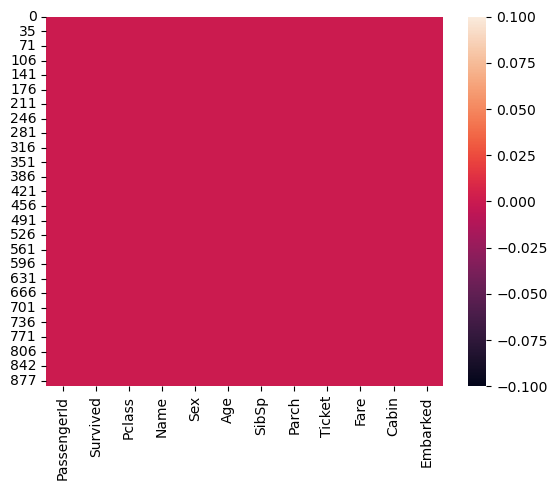

In [121]:
sns.heatmap(tsp.isnull())

So far we have removed the null values in the dataset and also checked for the duplicates and observed that there are no duplicate rows or columns in the dataset

Now, i am removing the passenger id column from the dataset, as it doesn't add up to the target value, it is just like the indexing to the rows.

In [122]:
tsp.drop(['PassengerId'], axis=1, inplace=True)

In [123]:
tsp.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Now lets seperate the list of the object data type from the numerical data type columns

In [124]:
categorical_cols=[]
numerical_cols =[]
for i in tsp.dtypes.index:
    if tsp.dtypes[i]== "object":
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical columns", categorical_cols)
print("numerical_cols", numerical_cols)

Categorical columns ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_cols ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [125]:
tsp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Changing the 'Embarked' and 'Sex' columns into the numerical data in the dataset

In [126]:
tsp['Sex'] = tsp['Sex'].replace("male", 0)
tsp['Sex'] = tsp['Sex'].replace("female",1)

In [127]:
tsp['Embarked']= tsp['Embarked'].replace("S",0)
tsp['Embarked']= tsp['Embarked'].replace("C",1)
tsp['Embarked']= tsp['Embarked'].replace("Q",2)


In [128]:
categorical_cols=[]
numerical_cols =[]
for i in tsp.dtypes.index:
    if tsp.dtypes[i]== "object":
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print("Categorical columns", categorical_cols)
print("numerical_cols", numerical_cols)

Categorical columns ['Name', 'Ticket', 'Cabin']
numerical_cols ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [129]:
tsp.describe()

Survived      Pclass         Sex         Age       SibSp       Parch  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     0.382452    2.311586    0.350956   29.713352    0.524184    0.382452   
std      0.486260    0.834700    0.477538   12.969135    1.103705    0.806761   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   30.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  889.000000  889.000000  
mean    32.096681    0.362205  
std     49.697504    0.636157  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329200    2.000000

Data Visualization

Univarient Analysis

0    549
1    340
Name: Survived, dtype: int64


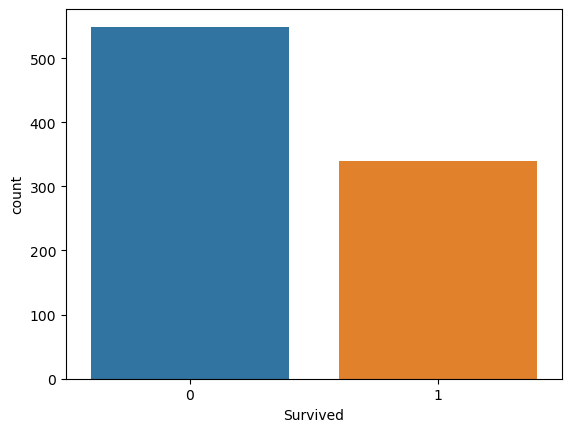

In [131]:
#Visualizing the Survived column
ax= sns.countplot(x='Survived', data=tsp)
print(tsp['Survived'].value_counts())


In [132]:
tsp.shape

(889, 11)

Considering 0 means not survived and 1 means survived.
By the above data visualization it is observed that 549 out of 889 haven't survived and 340 did survived

3    491
1    214
2    184
Name: Pclass, dtype: int64


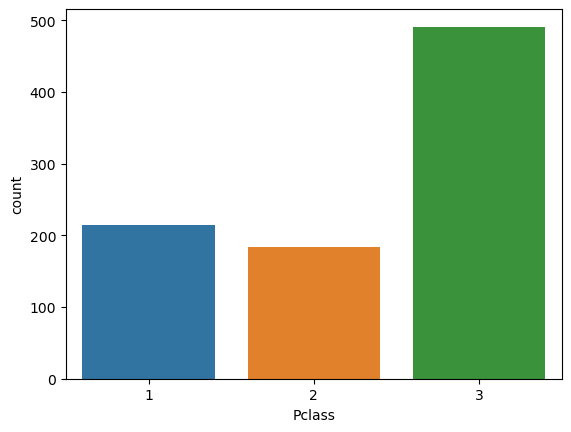

In [133]:
#Visualizing the Pclass data

ax= sns.countplot(x="Pclass", data= tsp)
print(tsp["Pclass"].value_counts())

By the above data visualization and the value counts, it is observed that 214 people were there in the 1st Class, 184 is the 2nd class and 491 in third class

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


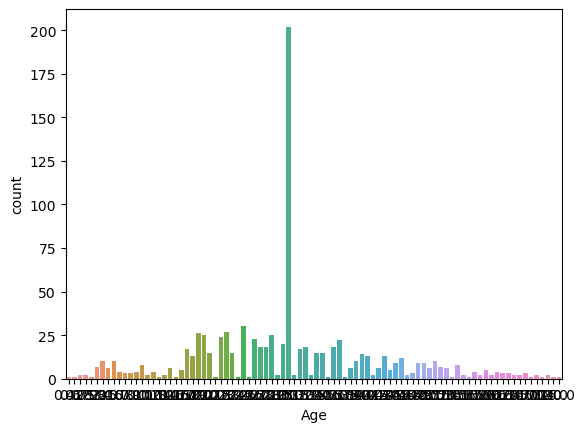

In [134]:
#Visualizing the Age attribute
ax =sns.countplot(x="Age", data=tsp)
print(tsp['Age'].value_counts())

the data visualization isn't so clear in this, let try another method

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


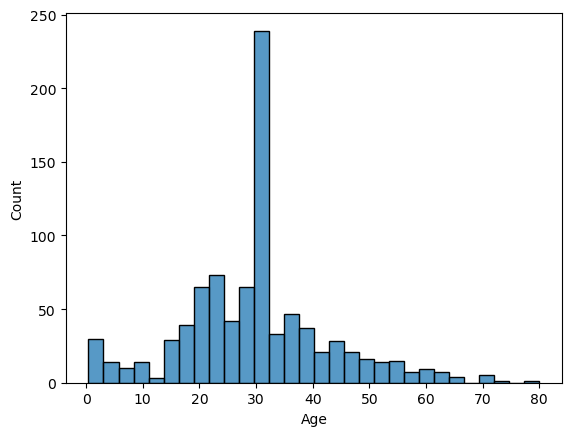

In [135]:
ax = sns.histplot(x="Age",data=tsp)
print(tsp['Age'].value_counts())

In histogram the data visualization is clear, the age of the people in the Titanic survey report is widely spread from 1 to 80
and majority of the data lies between 30 to 40

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


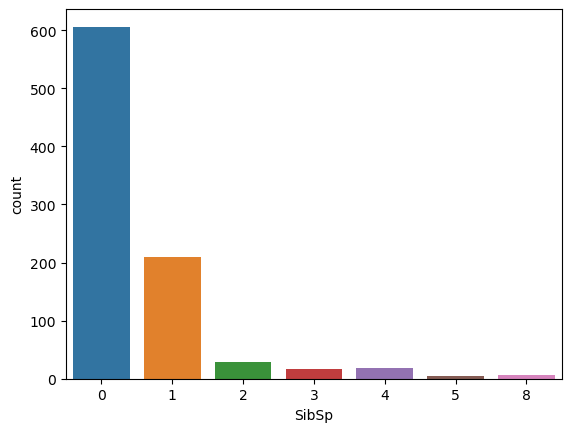

In [136]:
#Visualizing the SibSp data
ax = sns.countplot(x='SibSp', data= tsp)
print(tsp['SibSp'].value_counts())

From the above dataset it is observed that, 606 members have 0 spouse/siblings
209 have 1, 28 have 2 sibblings, 16 have 3 sibblings, 18 have sibblings, 8 have 8 sibblings and 5 have 5

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


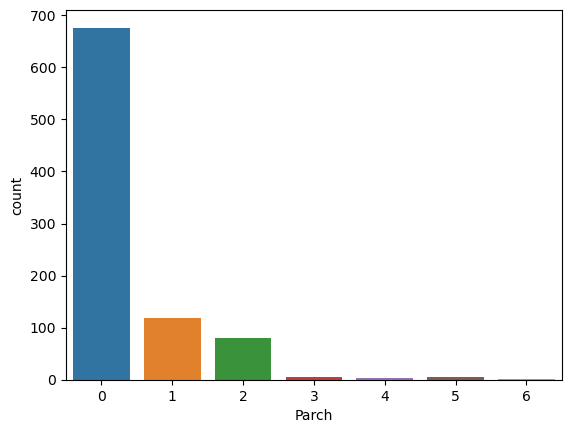

In [137]:
#Visualizing the parch data

ax =sns.countplot(x= 'Parch', data=tsp)
print(tsp["Parch"].value_counts())

Here, according to the data visualization we can observe that maximum number of people are travelling without their Parents or Childern 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64


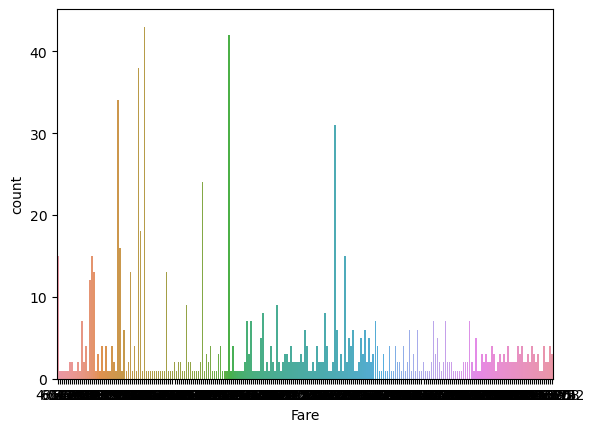

In [138]:
#Visualizing the Fare column
ax = sns.countplot(x='Fare', data=tsp)
print(tsp['Fare'].value_counts())

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 247, dtype: int64


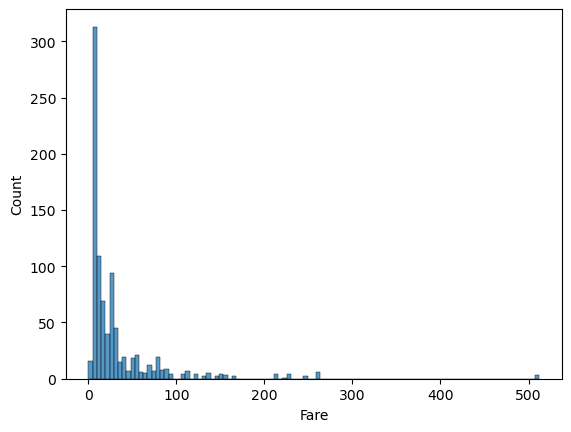

In [139]:
#let's try a different visualization methods
ax = sns.histplot(x='Fare', data= tsp)
#ax = sns.kdeplot(x='Fare', data=tsp, shade=True)
print(tsp['Fare'].value_counts())



Majority of the people paid the fare amount between 0-100.
there are few between 100-200 and 300 there are also people travelling by very less above 500

0    644
1    168
2     77
Name: Embarked, dtype: int64


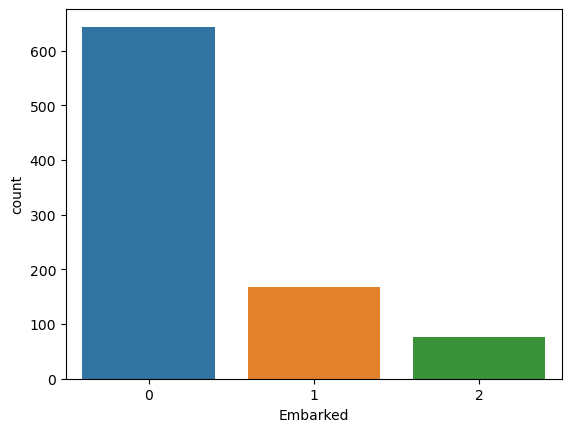

In [140]:
#Visualizing Embarked data
ax = sns.countplot(x= "Embarked", data= tsp)
print(tsp['Embarked'].value_counts())

Bivarient Visualization

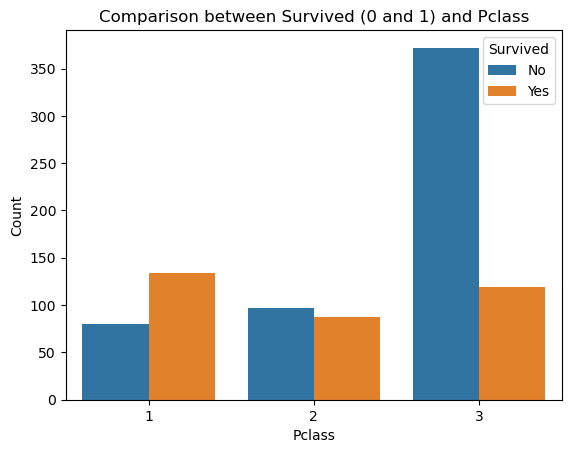

In [142]:
# Visulizing the relationship between the pclass and survived
plt.title("Comparison between Survived (0 and 1) and Pclass")
sns.countplot(x='Pclass', hue='Survived', data=tsp)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


It is observed that the survival rate from the 1st class is high and the 3 is the lowest

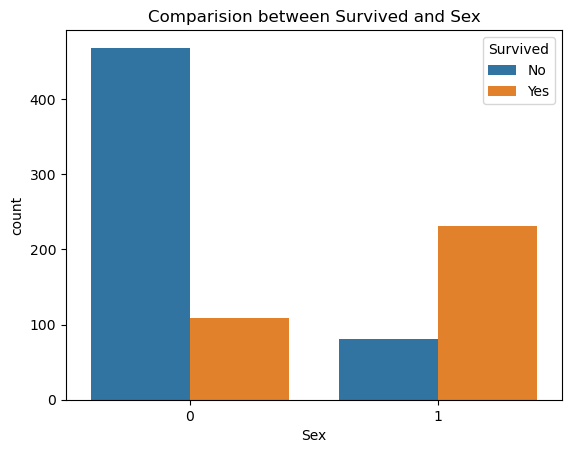

In [143]:
#Data visualization of the relation between Survived and Sex
plt.title("Comparision between Survived and Sex")
sns.countplot(x='Sex', hue ='Survived', data= tsp)
plt.xlabel= 'Sex'
plt.ylabel= 'Count'
plt.legend(title='Survived', labels=['No','Yes'])


The survival rate in men is less compared to women

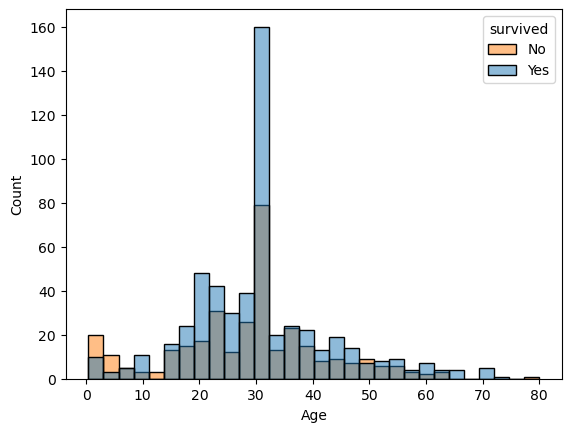

In [144]:
#Data visualization of the relationship between survived and age
plt.title=("Comparision between the Survived and Age")
sns.histplot(x='Age', hue='Survived', data=tsp)
plt.xlabel = 'Age'
plt.ylabel = 'Count'
plt.legend(title= 'survived', labels = ['No', 'Yes'])

Here we can see that in the bars represent total number of people in that age, blue represents Not survived and grey/orange represents survived

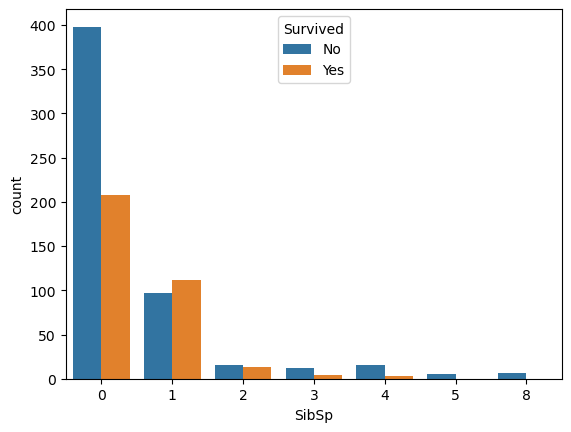

In [145]:
#Datvisualization between survived and SibSp
plt.title=("Comparision between Survived and SibSp")
sns.countplot(x='SibSp', hue = 'Survived', data=tsp)
plt.xlabel ='SibSp'
plt.ylabel = 'Count'
plt.legend(title = 'Survived',labels=['No', 'Yes'])

The survived rate is higher for the people who came along with 1 or 2 sibbling/spouse when comparred to the others

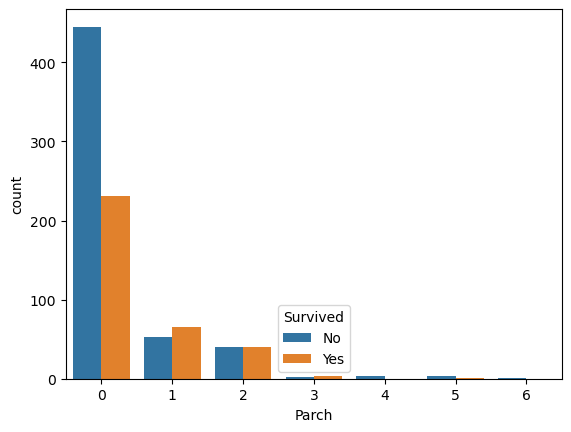

In [146]:
#Data Visualization of the Survived and Parch
plt.title = ("Comparision between the survived and the Parch")
sns.countplot(x='Parch', hue='Survived', data=tsp)
plt.xlabel= 'Parch'
plt.ylabel = 'Count'
plt.legend(title = 'Survived', labels=['No','Yes'])


The survived rate is high for the people who came with 1, 2 or 3 parent/childern

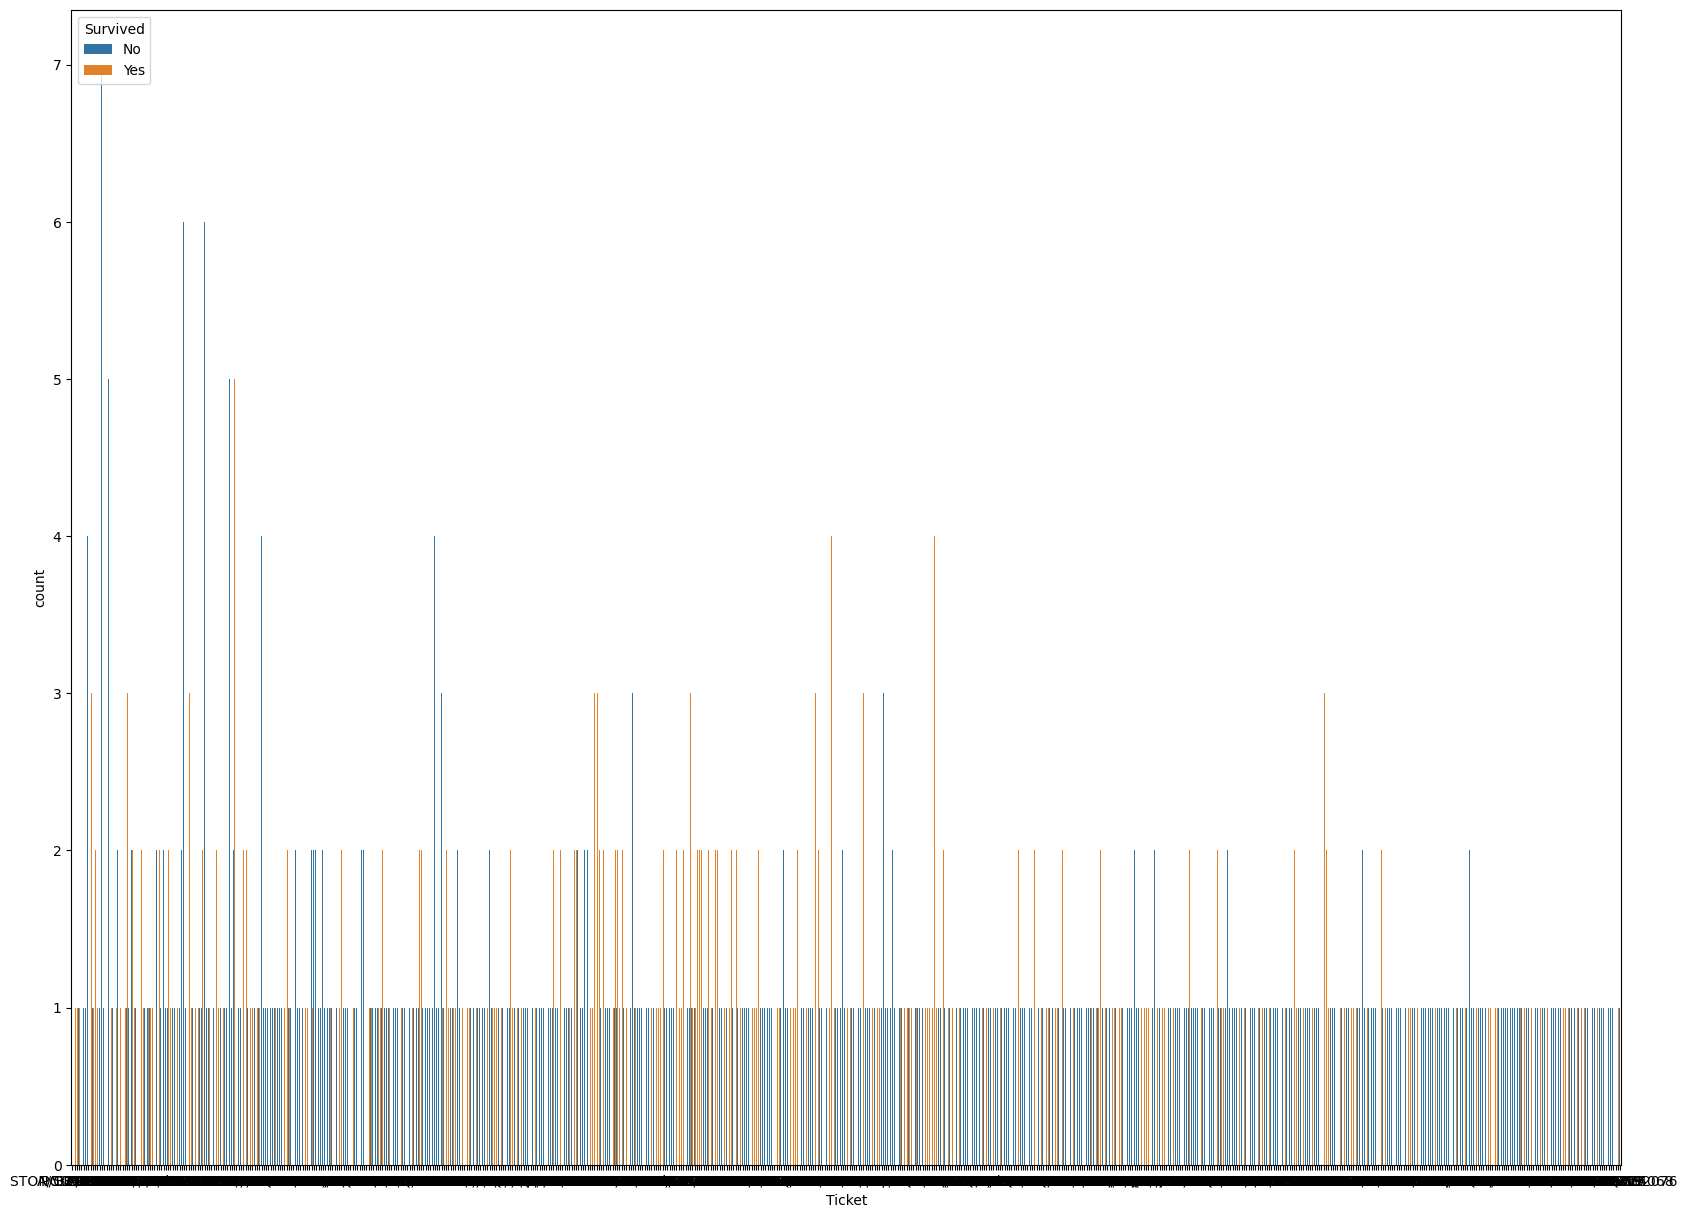

In [147]:
#Data Visualization of the Survived and Ticket

plt.figure(figsize=(20,15))

plt.title = ("Comparision between the survived and the Ticket")
sns.countplot(x='Ticket', hue='Survived', data=tsp)
plt.xlabel= 'Ticket'
plt.ylabel = 'Count'
plt.legend(title = 'Survived', labels=['No','Yes'])

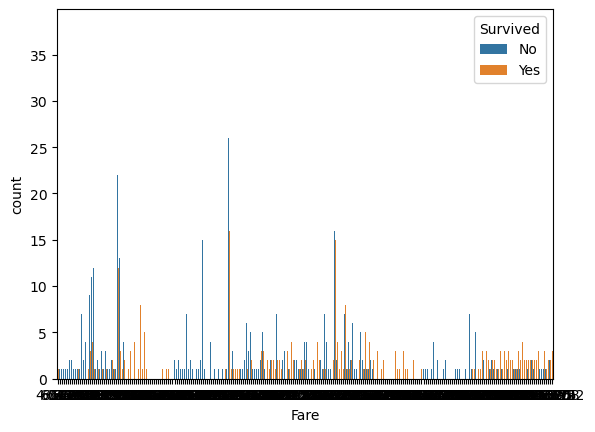

In [148]:
#Data Visualization of the Survived and Fare

plt.title = ("Comparision between the survived and the Fare")
sns.countplot(x='Fare', hue='Survived', data=tsp)
plt.xlabel= 'Fare'
plt.ylabel = 'Count'
plt.legend(title = 'Survived', labels=['No','Yes'])

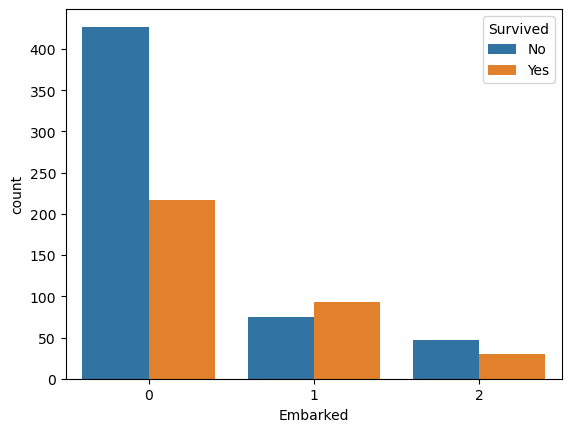

In [149]:
#Data Visualization of the Survived and Embarked

plt.title = ("Comparision between the survived and the Embarked")
sns.countplot(x='Embarked', hue='Survived', data=tsp)
plt.xlabel= 'Embarked'
plt.ylabel = 'Count'
plt.legend(title = 'Survived', labels=['No','Yes'])

Here it is observed that the survival rate is higher in the 1 category when compared with 0 and 2

Multivarient Visualization

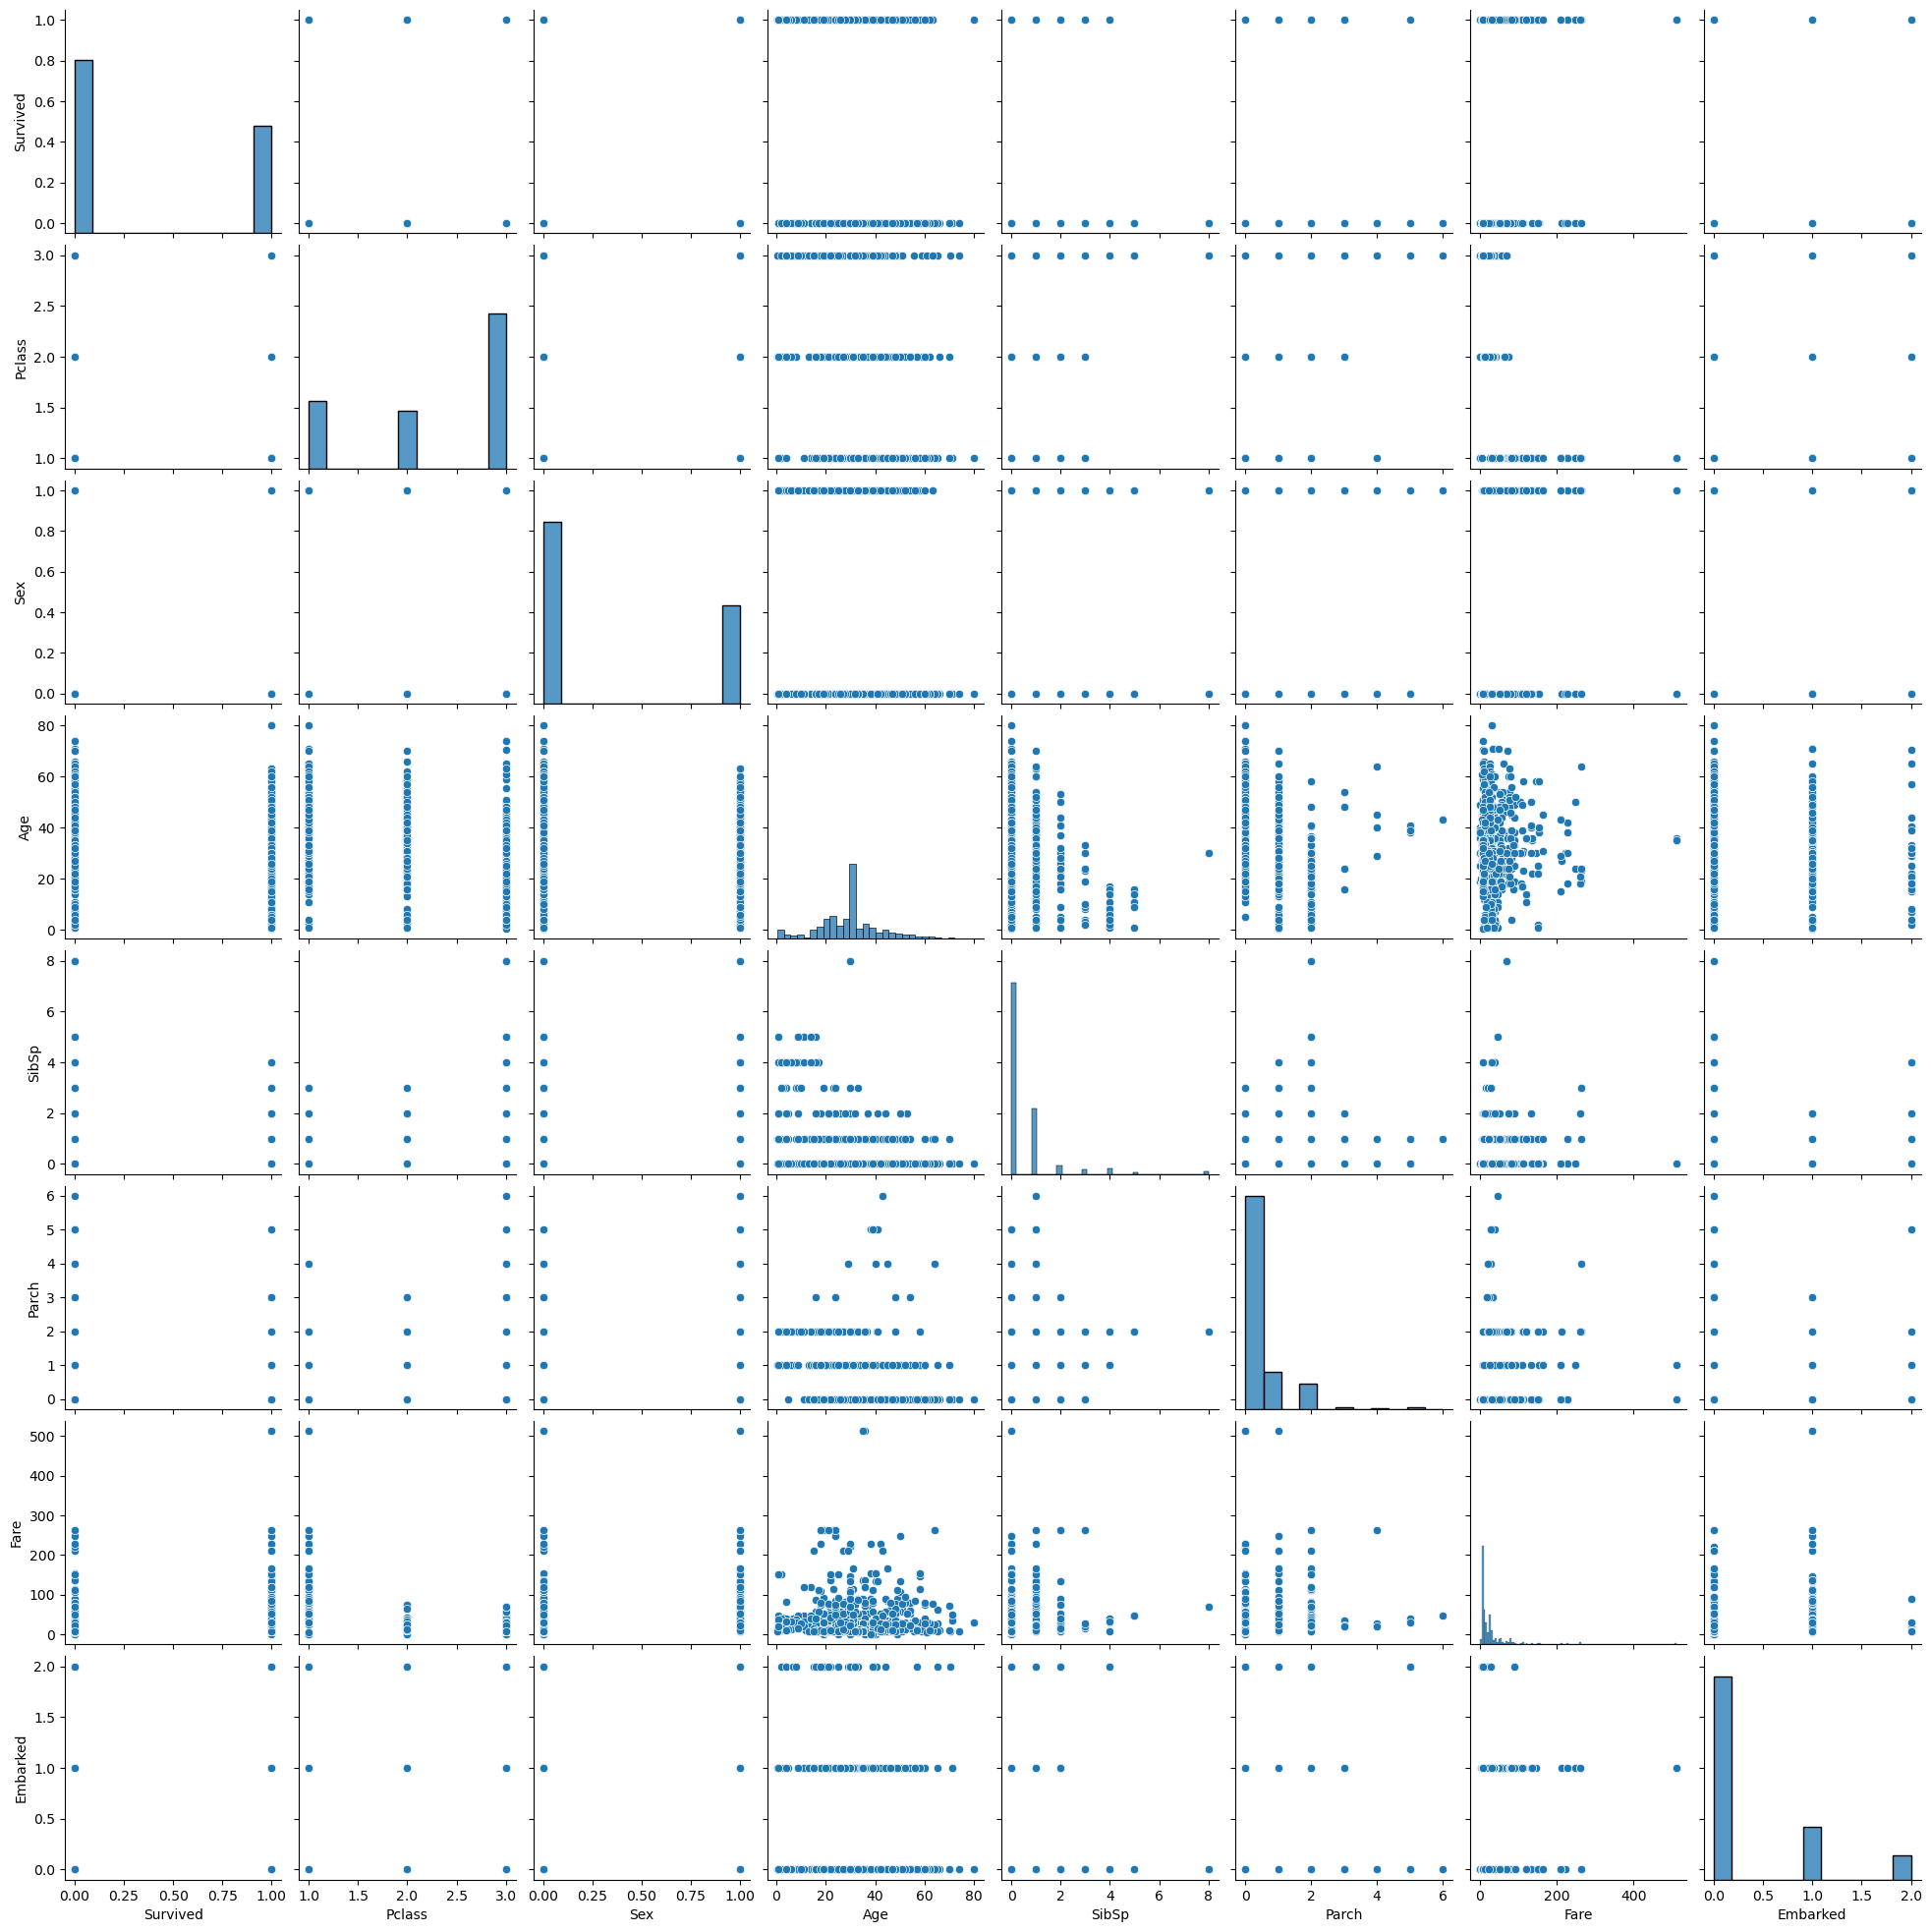

In [150]:

sns.pairplot(tsp)
plt.show()


From the above it is observed that few attributes have outliers. Let's check for the outliers

<AxesSubplot:>

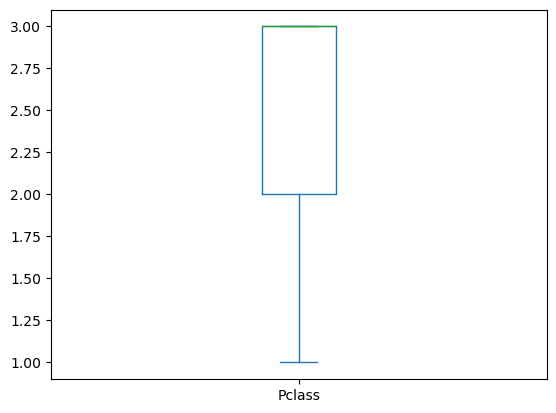

In [151]:
#Identifying the Outliers in 'Pclass'
tsp['Pclass'].plot.box()

No outliers are present in Pclass data

<AxesSubplot:>

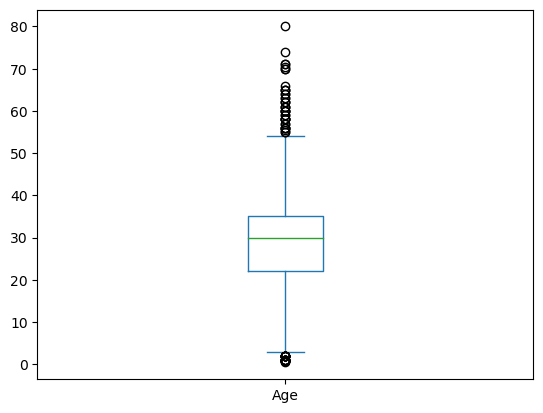

In [152]:
#Identifying the Outliers in 'Age'
tsp['Age'].plot.box()

There are outliers present in the Age data.

<AxesSubplot:>

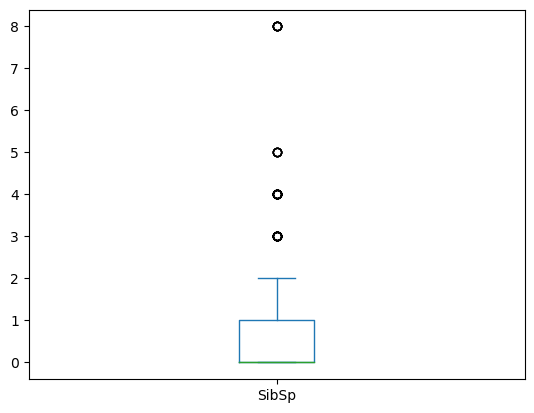

In [153]:
#Identifying the Outliers in 'SibSp'
tsp['SibSp'].plot.box()

There are outliers present in the SibSp data.

<AxesSubplot:>

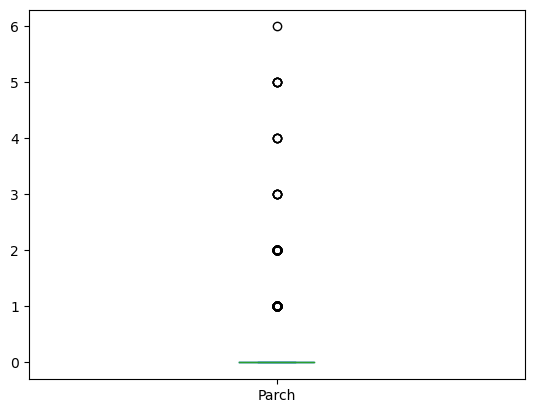

In [154]:
#Identifying the Outliers in 'Parch'
tsp['Parch'].plot.box()

There are outliers present in the Parch data.

<AxesSubplot:>

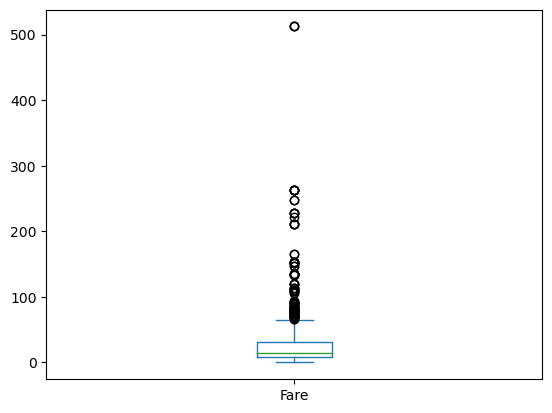

In [155]:
#Identifying the Outliers in 'Fare'
tsp['Fare'].plot.box()

There are outliers present in the Fare data.

<AxesSubplot:>

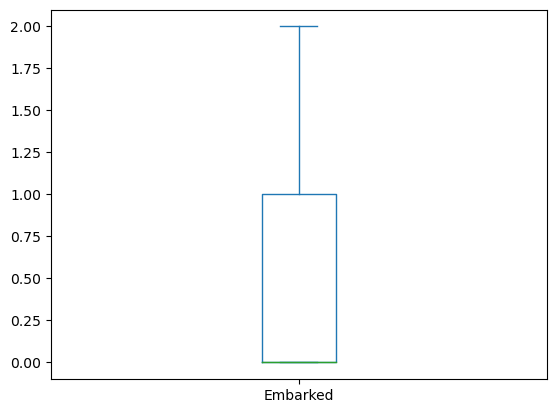

In [156]:
#Identifying the Outliers in 'Embarked'
tsp['Embarked'].plot.box()

There are  no outliers present in the Embarked data.

Let's now calculate the Zscore

In [158]:
numerical_cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [159]:
cls = tsp.columns[[1,3,4,5,6,8,10]]

In [160]:
cls

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [161]:
x= tsp.loc[:,cls]

In [162]:
x


Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  30.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[889 rows x 7 columns]

In [163]:
z=np.abs(zscore(x))

In [164]:
z


Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0    0.825209  0.735342  0.595082  0.431350  0.474326  0.500240  0.569684
1    1.572211  1.359911  0.639311  0.431350  0.474326  0.788947  1.003139
2    0.825209  1.359911  0.286483  0.475199  0.474326  0.486650  0.569684
3    1.572211  1.359911  0.407863  0.431350  0.474326  0.422861  0.569684
4    0.825209  0.735342  0.407863  0.475199  0.474326  0.484133  0.569684
..        ...       ...       ...       ...       ...       ...       ...
886  0.373501  0.735342  0.209334  0.475199  0.474326  0.384475  0.569684
887  1.572211  1.359911  0.826530  0.475199  0.474326  0.042213  0.569684
888  0.825209  1.359911  0.022115  0.431350  2.006119  0.174084  0.569684
889  1.572211  0.735342  0.286483  0.475199  0.474326  0.042213  1.003139
890  0.825209  0.735342  0.176414  0.475199  0.474326  0.490173  2.575963

[889 rows x 7 columns]

In [165]:
Threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  67,  70,  85,  87,  95, 115, 117,
       118, 158, 163, 166, 170, 179, 181, 200, 232, 257, 260, 265, 277,
       298, 310, 323, 340, 359, 376, 379, 385, 436, 437, 437, 479, 492,
       526, 540, 541, 556, 566, 609, 629, 637, 671, 677, 678, 682, 685,
       688, 699, 715, 729, 735, 736, 741, 744, 773, 778, 786, 791, 812,
       823, 844, 848, 849, 856, 861, 883], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


These are the values with the higher zscore compared to the Thresold value, now, let's check the data, bu seeing the zscore values of the above given data

In [166]:
z.iloc[13][4]

5.726787126135417

In [167]:
z.iloc[883][4]

5.726787126135417

In [168]:
z.iloc[87][5]

4.648790695770894

Let's create a new data frame by removing the outliers

In [785]:
tsp_new =  tsp[(z<3).all(axis=1)]  
tsp_new

Survived  Pclass                                               Name  Sex  \
0           0       3                            Braund, Mr. Owen Harris    0   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2           1       3                             Heikkinen, Miss. Laina    1   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4           0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886         0       2                              Montvila, Rev. Juozas    0   
887         1       1                       Graham, Miss. Margaret Edith    1   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889         1       1                              Behr, Mr. Karl Howell    0   
890         0       3                                Dooley, Mr. Patrick    0   

      Age  SibSp  Parch            Ticket     Fare    Cabin  Embarked  
0    22.0      1      0         A/5 21171   7.2500  Unknown         0  
1    38.0      1      0          PC 17599  71.2833      C85         1  
2    26.0      0      0  STON/O2. 3101282   7.9250  Unknown         0  
3    35.0      1      0            113803  53.1000     C123         0  
4    35.0      0      0            373450   8.0500  Unknown         0  
..    ...    ...    ...               ...      ...      ...       ...  
886  27.0      0      0            211536  13.0000  Unknown         0  
887  19.0      0      0            112053  30.0000      B42         0  
888  30.0      1      2        W./C. 6607  23.4500  Unknown         0  
889  26.0      0      0            111369  30.0000     C148         1  
890  32.0      0      0            370376   7.7500  Unknown         2  

[818 rows x 11 columns]

In [786]:
skewness = tsp_new.skew()
skewness

Survived    0.457268
Pclass     -0.639191
Sex         0.671699
Age         0.295777
SibSp       1.975774
Parch       2.118544
Fare        2.342849
Embarked    1.548816
dtype: float64

The data here shows the skewness present in dataset, Now, let's see the data visualization of the same

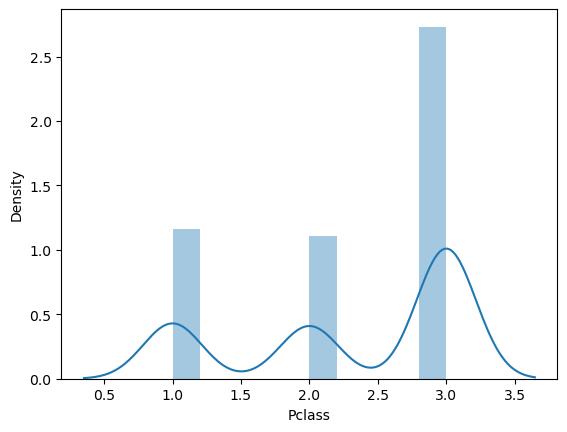

In [787]:
sns.distplot(tsp_new['Pclass'])
plt.show()

The data here is widely distributed between 0.5 to 3.5

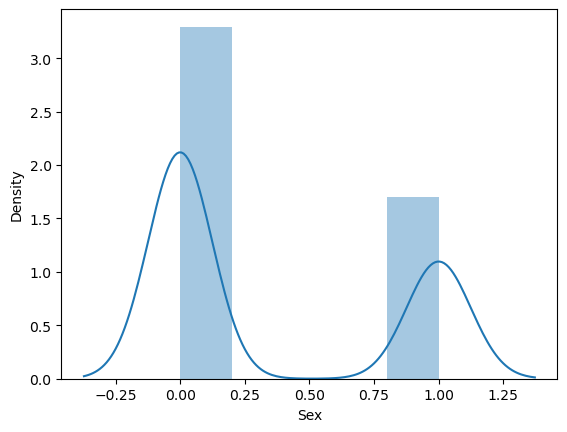

In [788]:
sns.distplot(tsp_new['Sex'])
plt.show()

The skewness in Sex column cannot be reduced as the column contains only 2 values 

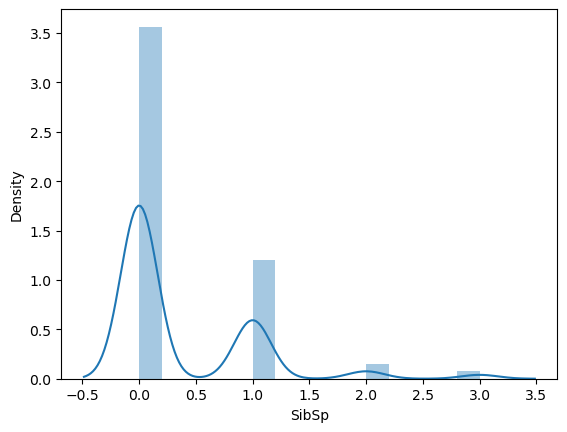

In [789]:
sns.distplot(tsp_new['SibSp'])
plt.show()

Here we cab observed from the graph that the data is right skewed

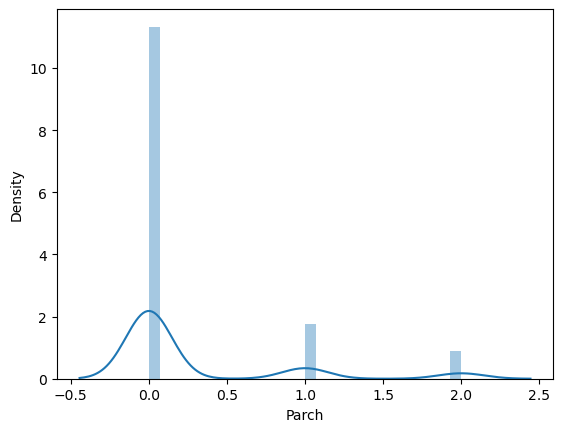

In [790]:
sns.distplot(tsp_new['Parch'])
plt.show()

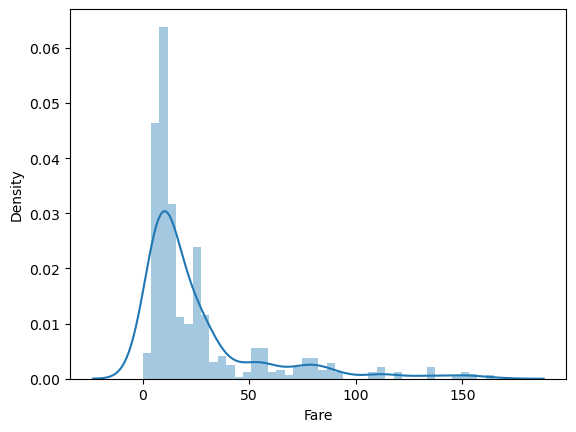

In [791]:
sns.distplot(tsp_new['Fare'])
plt.show()

Here we can observed from the graph that the data is right skewed

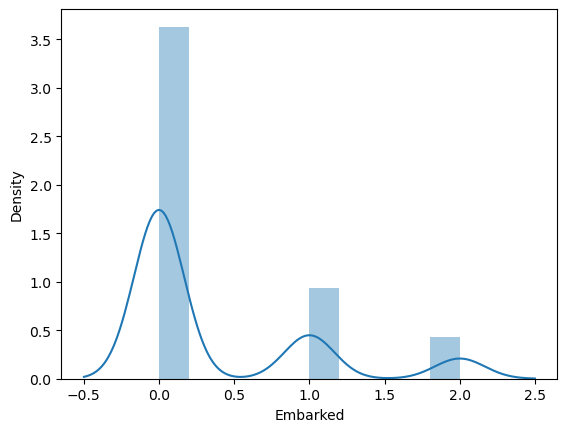

In [792]:
sns.distplot(tsp_new['Embarked'])
plt.show()

Let's remove the skewness of the data here

In [793]:
from scipy.stats import yeojohnson
tsp_new['Pclass'], lambda_value = yeojohnson(tsp_new['Pclass'])

In [794]:
#Reducing the skewness of the SibSp data

#tsp_new['SibSp'] = np.log10(tsp_new['SibSp'])
#tsp_new['SibSp'], lambda_value = yeojohnson(tsp_new['SibSp'])
#from scipy import stats
#tsp_new['SibSp'] = winsorize(tsp_new['SibSp'], limits=[0.05, 0.05])

# Perform Box-Cox transformation
#tsp_new['SibSp'], lambda_value = stats.boxcox(tsp_new['SibSp'])

tsp_new['SibSp'] = np.cbrt(tsp_new['SibSp'])

Here, to reduce the skewness of the Sibsp i tried different methods and used the best sutable method

In [795]:
#Reducing the skewness of the Parch data

from scipy.stats.mstats import winsorize
tsp_new['Parch'] = winsorize(tsp_new['Parch'], limits=[0.07, 0.07])
#tsp_new['Parch'] = np.log1p(tsp_new['Parch'])

In [796]:
#Reducing the skewness of the Fare data
#tsp_new['Fare'], lambda_value= yeojohnson(tsp_new['Fare'])

In [797]:
#Reducing the skewness of the Embarked data
#tsp_new['Embarked'], lambda_value= yeojohnson(tsp_new['Embarked'])

In [798]:
tsp_new.skew()

Survived    0.457268
Pclass     -0.433034
Sex         0.671699
Age         0.295777
SibSp       1.014998
Parch       1.577454
Fare        2.342849
Embarked    1.548816
dtype: float64

This is the final result after reducing the skewness of the data

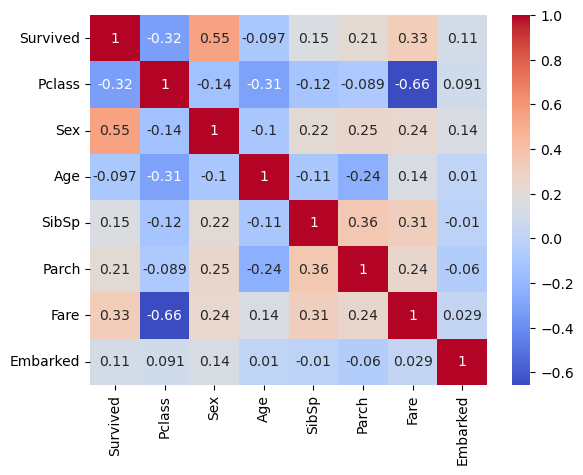

In [801]:
corr=tsp_new.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

The above graph shows the correlation between the columns in the dataset.
Here are my observations:
    1. Pclass have highly negative correlation with Fare
    2. Sex has positive correlation with SibSp, Parch and Fare
    3. SibSp have positive correlation with Fare and Parch
    

Now, converting the categorical data into numerical for the Model

In [802]:
tsp_new['Cabin_encoded'] = le.fit_transform(tsp_new['Cabin'])

In [803]:
tsp_new


Survived     Pclass                                               Name  \
0           0  13.330978                            Braund, Mr. Owen Harris   
1           1   1.921429  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1  13.330978                             Heikkinen, Miss. Laina   
3           1   1.921429       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0  13.330978                           Allen, Mr. William Henry   
..        ...        ...                                                ...   
886         0   6.161258                              Montvila, Rev. Juozas   
887         1   1.921429                       Graham, Miss. Margaret Edith   
888         0  13.330978           Johnston, Miss. Catherine Helen "Carrie"   
889         1   1.921429                              Behr, Mr. Karl Howell   
890         0  13.330978                                Dooley, Mr. Patrick   

     Sex   Age  SibSp  Parch            Ticket     Fare    Cabin  Embarked  \
0      0  22.0    1.0      0         A/5 21171   7.2500  Unknown         0   
1      1  38.0    1.0      0          PC 17599  71.2833      C85         1   
2      1  26.0    0.0      0  STON/O2. 3101282   7.9250  Unknown         0   
3      1  35.0    1.0      0            113803  53.1000     C123         0   
4      0  35.0    0.0      0            373450   8.0500  Unknown         0   
..   ...   ...    ...    ...               ...      ...      ...       ...   
886    0  27.0    0.0      0            211536  13.0000  Unknown         0   
887    1  19.0    0.0      0            112053  30.0000      B42         0   
888    1  30.0    1.0      1        W./C. 6607  23.4500  Unknown         0   
889    0  26.0    0.0      0            111369  30.0000     C148         1   
890    0  32.0    0.0      0            370376   7.7500  Unknown         2   

     Cabin_encoded  
0              134  
1               69  
2              134  
3               47  
4              134  
..             ...  
886            134  
887             25  
888            134  
889             52  
890            134  

[818 rows x 12 columns]

In [804]:
tsp_new.dtypes

Survived           int64
Pclass           float64
Name              object
Sex                int64
Age              float64
SibSp            float64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked           int64
Cabin_encoded      int32
dtype: object

Here, i am dropping the columns Name, Ticket and Cabin:
Name and Ticket = unneccessary data
Cabin = The encoded columns is added

In [805]:
tsp_new.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)


In [806]:
tsp_new

Survived     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0           0  13.330978    0  22.0    1.0      0   7.2500         0   
1           1   1.921429    1  38.0    1.0      0  71.2833         1   
2           1  13.330978    1  26.0    0.0      0   7.9250         0   
3           1   1.921429    1  35.0    1.0      0  53.1000         0   
4           0  13.330978    0  35.0    0.0      0   8.0500         0   
..        ...        ...  ...   ...    ...    ...      ...       ...   
886         0   6.161258    0  27.0    0.0      0  13.0000         0   
887         1   1.921429    1  19.0    0.0      0  30.0000         0   
888         0  13.330978    1  30.0    1.0      1  23.4500         0   
889         1   1.921429    0  26.0    0.0      0  30.0000         1   
890         0  13.330978    0  32.0    0.0      0   7.7500         2   

     Cabin_encoded  
0              134  
1               69  
2              134  
3               47  
4              134  
..             ...  
886            134  
887             25  
888            134  
889             52  
890            134  

[818 rows x 9 columns]

In [807]:
tsp_new.dtypes

Survived           int64
Pclass           float64
Sex                int64
Age              float64
SibSp            float64
Parch              int64
Fare             float64
Embarked           int64
Cabin_encoded      int32
dtype: object

now, on checking the data types of each column, the data type is either int or float. 
Now, we can go ahead and apply the Model, Logistic Regression as the target value is Binary.

Storing all the independent attributes in the X variable

In [808]:
X=tsp_new.iloc[:,1:-1]

In [809]:
X

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0    13.330978    0  22.0    1.0      0   7.2500         0
1     1.921429    1  38.0    1.0      0  71.2833         1
2    13.330978    1  26.0    0.0      0   7.9250         0
3     1.921429    1  35.0    1.0      0  53.1000         0
4    13.330978    0  35.0    0.0      0   8.0500         0
..         ...  ...   ...    ...    ...      ...       ...
886   6.161258    0  27.0    0.0      0  13.0000         0
887   1.921429    1  19.0    0.0      0  30.0000         0
888  13.330978    1  30.0    1.0      1  23.4500         0
889   1.921429    0  26.0    0.0      0  30.0000         1
890  13.330978    0  32.0    0.0      0   7.7500         2

[818 rows x 7 columns]

The target value is stored in y

In [810]:
y=tsp_new.iloc[:,0]

In [811]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 818, dtype: int64

X.shape shows the number of rows and columns present, the rows must be equal in X and y

In [812]:
X.shape

(818, 7)

In [813]:
y.shape

(818,)

Seggregating the data into Training data (generally 70 to 80% of the data) and testing data(rest of the 30 to 20% of the data) for Fit and Predict method

In [814]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=42)

In [815]:
X_train.shape

(572, 7)

In [816]:
X_test.shape

(246, 7)

In [817]:
y_train.shape

(572,)

In [818]:
y_test.shape

(246,)

In [819]:
lg = LogisticRegression()

In [820]:
lg.fit(X_train,y_train)

LogisticRegression()

In [821]:
pred=lg.predict(X_test)

In [822]:
pred # this is the data that the machine predicated after learning from the fit method

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

In [823]:
accuracy_score(y_test,pred) 

0.8252032520325203

The accuracy of the model is 82%

In [824]:
print(confusion_matrix(y_test,pred))

[[133  14]
 [ 29  70]]


Creating the confusion matrix for the pred data given by the model

<AxesSubplot:>

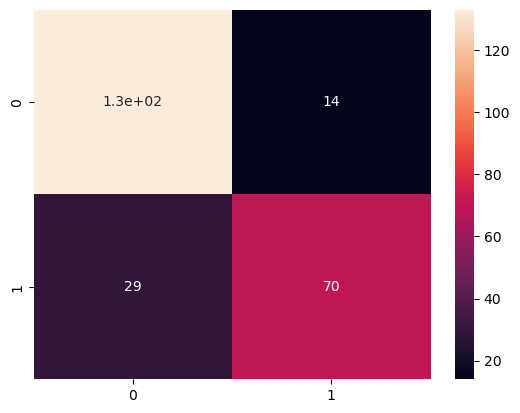

In [825]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

Graphical representation of the confusion matrix with data.
here 133 and 70 is which the model predictted correctly
and 29 and 14 are the errors

In [826]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       147
           1       0.83      0.71      0.77        99

    accuracy                           0.83       246
   macro avg       0.83      0.81      0.81       246
weighted avg       0.83      0.83      0.82       246



Here is the classification report of the Results given by the model.